# Imports

In [1]:
# To run all the expressions in each cell. 
# To return to the default behavior, write: InteractiveShell.ast_node_interactivity = "last_expr"

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns 

# Acquisition and first inspection of the main database

Let's import the database, preview its first few rows and inspect the columns.

In [3]:
df = pd.read_csv('Deaths_db.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346342 entries, 0 to 346341
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            346342 non-null  int64  
 1   WEEK                            346342 non-null  int64  
 2   Week Ending Date                346342 non-null  object 
 3   REGION                          346342 non-null  int64  
 4   State                           340300 non-null  object 
 5   City                            340300 non-null  object 
 6   Pneumonia and Influenza Deaths  343058 non-null  float64
 7   All Deaths                      344871 non-null  float64
 8   <1 year (all cause deaths)      338953 non-null  float64
 9   1-24 years (all cause deaths)   339374 non-null  float64
 10  25-44 years                     342711 non-null  float64
 11  45-64 years (all cause deaths)  344662 non-null  float64
 12  65+ years (all c

In [4]:
# Columns of df are named inconsistently + very long names. Rename them and change the data type of entries of some. 
# I prefer to have the first six columns object (i.e. strings)..

dict_columns = {'Year':'year', 'WEEK':'week', 'Week Ending Date':'week_end', 'REGION':'region', 'State':'state', 
                'City':'city', 'Pneumonia and Influenza Deaths':'PI_deaths', 'All Deaths':'all_deaths', 
                '<1 year (all cause deaths)':'0_deaths', '1-24 years (all cause deaths)':'1-24_deaths', 
                '25-44 years':'25-44_deaths', '45-64 years (all cause deaths)':'45-64_deaths', 
                '65+ years (all cause deaths)':'65+_deaths'};
df.rename(columns=dict_columns, inplace=True)

df[['year', 'week', 'region']] = df[['year', 'week', 'region']].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346342 entries, 0 to 346341
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          346342 non-null  object 
 1   week          346342 non-null  object 
 2   week_end      346342 non-null  object 
 3   region        346342 non-null  object 
 4   state         340300 non-null  object 
 5   city          340300 non-null  object 
 6   PI_deaths     343058 non-null  float64
 7   all_deaths    344871 non-null  float64
 8   0_deaths      338953 non-null  float64
 9   1-24_deaths   339374 non-null  float64
 10  25-44_deaths  342711 non-null  float64
 11  45-64_deaths  344662 non-null  float64
 12  65+_deaths    344845 non-null  float64
dtypes: float64(7), object(6)
memory usage: 34.4+ MB


There are 6042 rows of the DataFrame with a NaN in either the state or the city column (in fact both, as shown below). Let's create a new DataFrame only including those data. When mortality data are present (i.e. it isn't just a row of NaN's), we might be able to guess a posteriori what city do those data belong to.

In [5]:
df_nocity = df[df['city'].isna()]

df_nocity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6042 entries, 96790 to 302205
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6042 non-null   object 
 1   week          6042 non-null   object 
 2   week_end      6042 non-null   object 
 3   region        6042 non-null   object 
 4   state         0 non-null      object 
 5   city          0 non-null      object 
 6   PI_deaths     5982 non-null   float64
 7   all_deaths    5982 non-null   float64
 8   0_deaths      5982 non-null   float64
 9   1-24_deaths   5982 non-null   float64
 10  25-44_deaths  5982 non-null   float64
 11  45-64_deaths  5982 non-null   float64
 12  65+_deaths    5982 non-null   float64
dtypes: float64(7), object(6)
memory usage: 660.8+ KB


In [6]:
# Restrict the main DataFrame to the rows with non-missing values of 'state' and 'city'.

df = df[df['city'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340300 entries, 0 to 346341
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          340300 non-null  object 
 1   week          340300 non-null  object 
 2   week_end      340300 non-null  object 
 3   region        340300 non-null  object 
 4   state         340300 non-null  object 
 5   city          340300 non-null  object 
 6   PI_deaths     337076 non-null  float64
 7   all_deaths    338889 non-null  float64
 8   0_deaths      332971 non-null  float64
 9   1-24_deaths   333392 non-null  float64
 10  25-44_deaths  336729 non-null  float64
 11  45-64_deaths  338680 non-null  float64
 12  65+_deaths    338863 non-null  float64
dtypes: float64(7), object(6)
memory usage: 36.3+ MB


Ok, now we are left with a DataFrame having missing values only in the numeric columns. We will investigate it further in what follows.

What's the meaning of *region*? What states does every region contain?

In [7]:
for i in range(1, 10):
    print(*sorted(df[df['region'] == i].state.unique()))

CT MA RI
NJ NY PA
IL IN MI OH WI
IA KS MN MO NE
DC DE FL GA MD NC VA
AL KY TN
AR LA OK TX
AZ CO ID NM NV UT
CA HI OR WA


* Region 1: Massachusetts, Connecticut, Rhode Island
* Region 2: New York, New Jersey, Pennsylvania
* Region 3: Great Lakes
* Region 4: Center + Minnesota up North
* Region 5: Southern East Coast states 
* Region 6: Non-coastal SE
* Region 7: Center-South
* Region 8: Non-coastal SW + Idaho up North 
* Region 9: West Coast states + Hawaai

I won't be using this information in the following, but here it is.

Note that there is an ambiguity regarding Kansas City (noticed only after plotting data by city). Indeed, two homonimous cities contribute to the same metropolitan area across the border between Kansas and Missouri. It makes sense to rename them, adding the relevant state label, to remove any possible confusion.

In [8]:
df.loc[df['city'] == 'Kansas City'].sort_values('year')

df.loc[(df['city'] == 'Kansas City') & (df['state'] == 'KS'), 'city'] = 'Kansas City KS'
df.loc[(df['city'] == 'Kansas City') & (df['state'] == 'MO'), 'city'] = 'Kansas City MO'

df.loc[df['city'].str.contains('Kansas City')].sort_values('year')

year week    week_end region state         city  PI_deaths  \
160190  1962   39  09/29/1962      4    KS  Kansas City        4.0   
160189  1962   38  09/22/1962      4    MO  Kansas City        2.0   
160188  1962   38  09/22/1962      4    KS  Kansas City        5.0   
160187  1962   37  09/15/1962      4    MO  Kansas City        2.0   
160186  1962   37  09/15/1962      4    KS  Kansas City        4.0   
...      ...  ...         ...    ...   ...          ...        ...   
165765  2016   12  03/26/2016      4    KS  Kansas City        4.0   
165764  2016   11  03/19/2016      4    MO  Kansas City        4.0   
165763  2016   11  03/19/2016      4    KS  Kansas City        2.0   
165770  2016   14  04/09/2016      4    MO  Kansas City        3.0   
165820  2016   39  10/01/2016      4    MO  Kansas City       10.0   

        all_deaths  0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  \
160190        37.0       6.0          1.0           3.0           7.0   
160189       152.0      11.0          3.0           6.0          40.0   
160188        46.0       3.0          3.0           4.0          10.0   
160187       112.0       9.0          2.0           4.0          25.0   
160186        34.0       4.0          1.0           1.0           8.0   
...            ...       ...          ...           ...           ...   
165765        33.0       1.0          0.0           1.0          17.0   
165764       107.0       4.0          2.0           6.0          30.0   
165763        32.0       0.0          0.0           2.0          10.0   
165770        65.0       1.0          0.0           4.0          24.0   
165820        97.0       0.0          4.0           7.0          28.0   

        65+_deaths  
160190        20.0  
160189        92.0  
160188        26.0  
160187        72.0  
160186        20.0  
...            ...  
165765        14.0  
165764        64.0  
165763        20.0  
165770        36.0  
165820        57.0  

[5709 rows x 13 columns]

year week    week_end region state            city  PI_deaths  \
160190  1962   39  09/29/1962      4    KS  Kansas City KS        4.0   
160189  1962   38  09/22/1962      4    MO  Kansas City MO        2.0   
160188  1962   38  09/22/1962      4    KS  Kansas City KS        5.0   
160187  1962   37  09/15/1962      4    MO  Kansas City MO        2.0   
160186  1962   37  09/15/1962      4    KS  Kansas City KS        4.0   
...      ...  ...         ...    ...   ...             ...        ...   
165765  2016   12  03/26/2016      4    KS  Kansas City KS        4.0   
165764  2016   11  03/19/2016      4    MO  Kansas City MO        4.0   
165763  2016   11  03/19/2016      4    KS  Kansas City KS        2.0   
165770  2016   14  04/09/2016      4    MO  Kansas City MO        3.0   
165820  2016   39  10/01/2016      4    MO  Kansas City MO       10.0   

        all_deaths  0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  \
160190        37.0       6.0          1.0           3.0           7.0   
160189       152.0      11.0          3.0           6.0          40.0   
160188        46.0       3.0          3.0           4.0          10.0   
160187       112.0       9.0          2.0           4.0          25.0   
160186        34.0       4.0          1.0           1.0           8.0   
...            ...       ...          ...           ...           ...   
165765        33.0       1.0          0.0           1.0          17.0   
165764       107.0       4.0          2.0           6.0          30.0   
165763        32.0       0.0          0.0           2.0          10.0   
165770        65.0       1.0          0.0           4.0          24.0   
165820        97.0       0.0          4.0           7.0          28.0   

        65+_deaths  
160190        20.0  
160189        92.0  
160188        26.0  
160187        72.0  
160186        20.0  
...            ...  
165765        14.0  
165764        64.0  
165763        20.0  
165770        36.0  
165820        57.0  

[5709 rows x 13 columns]

### A consistency check

Consistency check: is the all_deaths column the sum of the 0_deaths, ..., 65+_deaths?

In [9]:
df['check'] = df['all_deaths'] - df[['0_deaths', '1-24_deaths', '25-44_deaths', '45-64_deaths', '65+_deaths']].sum(axis=1, skipna=False)

checksum = pd.Series(df['check'].value_counts(dropna=False))

In [10]:
display(df.dtypes)

year             object
week             object
week_end         object
region           object
state            object
city             object
PI_deaths       float64
all_deaths      float64
0_deaths        float64
1-24_deaths     float64
25-44_deaths    float64
45-64_deaths    float64
65+_deaths      float64
check           float64
dtype: object

In [11]:
# The series indices here are always integers: I would like them to be converted to int and then to strings. 
# Hence the following function. (completely useless, just for fun)

def make_index_str(df):
    index_dict = {}
    for c in df.index:
        try:
            index_dict[c] = str(int(c))
        except ValueError:
            index_dict[c] = 'NaN'
    df = df.rename(index_dict)
    return df

checksum = make_index_str(checksum)
pd.DataFrame(checksum)

check
0    322927
NaN    9348
1      5095
2      1222
3       536
4       251
5       162
6       134
7        94
8        83
9        70
10       59
11       43
12       40
13       36
14       29
15       26
17       19
18       14
16       13
22       11
20       10
21        8
19        7
30        6
29        5
26        4
25        4
28        4
24        4
32        3
35        2
27        2
87        2
33        2
65        2
71        1
38        1
44        1
48        1
37        1
31        1
52        1
58        1
39        1
61        1
41        1
85        1
90        1
46        1
47        1
95        1
59        1
110       1
128       1
100       1
72        1
114       1
70        1

It looks like - but for a few cases where relatively large discrepancies are present, to be investigated further - the numbers add up quite alright. However, we should assess how significant a give discrepancy in the *check* column is: 50 'missing' deaths in a large city like New York is not as bad a discrepancy as in a small town. Thus we introduce a further column quantifying the significancy of a discrepancy wrt the recorded total number of deaths.

In [12]:
df['check_%'] = 100 * df['check']/df['all_deaths']

# Look for rows where the relative discrepancy is very large while the total number of deaths is not too small 
# (sometimes the discrepancy is 1 out of 2 total recorded cases, but I don't want to get rid of that row)

tobedropped = df.loc[(df['check_%'] > 10) & (df['all_deaths'] > 50)]
df = df.drop(tobedropped.index)

# Look for remaining rows where the discrepancy is very large while the relative discrepancy is very large as well

tobedropped = df.loc[(df['check'] > 10) & (df['check_%'] > 10)]
df = df.drop(tobedropped.index)

del tobedropped

# We can see that the rows of our DataFrame show tamer, less outrageous discrepancies.
# At the cost of very few discarded rows (about 0.1% of the total number)

checksum = pd.Series(df['check'].value_counts(dropna=False))
checksum

0.0     322927
NaN       9348
1.0       5095
2.0       1222
3.0        536
4.0        251
5.0        162
6.0        130
7.0         91
8.0         79
9.0         59
10.0        46
11.0        26
12.0        22
13.0        17
14.0        13
15.0         9
18.0         3
17.0         2
26.0         1
27.0         1
16.0         1
Name: check, dtype: int64

So far we just cleaned the NaN-free part of our data.
Of course the elephant in the room is the non-negligible amount of missing values.

To get a better idea of where the problem might lie, let's split the database into several different ones, either by year or by city. 
We'll create dictionaries of DataFrames.

# Splitting the main database by year/city

This is useful to have smaller, more manageable DataFrames to manipulate; moreover, a natural thing to do will be to compute statistics of interest by year, as well as time series from databases pertaining to single cities.

We'll write functions generating dictionaries of databases, splitting the main one across different values found in a given column.

In [13]:
df['year'].unique()
df['city'].unique()

array([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=object)

array(['Boston', 'Hartford', 'Bridgeport', 'Cambridge', 'Somerville',
       'Allentown', 'Fall River', 'Camden', 'Yonkers', 'Lowell', 'Gary',
       'South Bend', 'Youngstown', 'Des Moines', 'Kansas City KS',
       'Lincoln', 'Lynn', 'New Bedford', 'New Haven', 'Providence',
       'Springfield', 'Waterbury', 'Worcester', 'Albany', 'Buffalo',
       'Elizabeth', 'Erie', 'Jersey City', 'New York', 'Newark',
       'Paterson', 'Philadelphia', 'Pittsburgh', 'Reading', 'Rochester',
       'Schenectady', 'Scranton', 'Syracuse', 'Trenton', 'Utica', 'Akron',
       'Canton', 'Chicago', 'Cincinnati', 'Cleveland', 'Columbus',
       'Dayton', 'Detroit', 'Evansville', 'Fort Wayne', 'Grand Rapids',
       'Indianapolis', 'Lansing', 'Milwaukee', 'Peoria', 'Rockford',
       'Toledo', 'Duluth', 'Kansas City MO', 'Minneapolis', 'Omaha',
       'Saint Louis', 'Saint Paul', 'Wichita', 'Atlanta', 'Wilimington',
       'Baltimore', 'Charlotte', 'Jacksonville', 'Birmingham',
       'Baton Rouge', 'Corp

In [14]:
def split_by(df, col):
    dictionary = {}
    col_setofvalues = df[col].unique()
    for val in col_setofvalues:
        dictionary[val] = df[df[col] == val].drop(['check', 'check_%'], axis=1)
    return dictionary

dict_year = split_by(df, 'year')
dict_city = split_by(df, 'city')

For example...

In [15]:
dict_year[1988]
dict_city['Chicago']

year week    week_end region state    city  PI_deaths  all_deaths  \
1357    1988    1  01/09/1988      1    MA  Boston       27.0       197.0   
1358    1988    2  01/16/1988      1    MA  Boston       24.0       174.0   
1359    1988    3  01/23/1988      1    MA  Boston       22.0       173.0   
1360    1988    4  01/30/1988      1    MA  Boston       27.0       196.0   
1361    1988    5  02/06/1988      1    MA  Boston       19.0       196.0   
...      ...  ...         ...    ...   ...     ...        ...         ...   
344889  1988   48  12/03/1988      9    WA  Tacoma        3.0        35.0   
344890  1988   49  12/10/1988      9    WA  Tacoma        5.0        51.0   
344891  1988   50  12/17/1988      9    WA  Tacoma        2.0        42.0   
344892  1988   51  12/24/1988      9    WA  Tacoma        5.0        49.0   
344893  1988   52  12/31/1988      9    WA  Tacoma        4.0        41.0   

        0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  65+_deaths  
1357         3.0          6.0          16.0          51.0       121.0  
1358         3.0          5.0           9.0          37.0       120.0  
1359         8.0          7.0           9.0          37.0       112.0  
1360         9.0          3.0          18.0          47.0       119.0  
1361         8.0          8.0          19.0          36.0       125.0  
...          ...          ...           ...           ...         ...  
344889       0.0          0.0           2.0           6.0        27.0  
344890       1.0          4.0           1.0           9.0        36.0  
344891       0.0          0.0           4.0          10.0        28.0  
344892       0.0          0.0           3.0          11.0        35.0  
344893       1.0          2.0           3.0           7.0        28.0  

[6135 rows x 13 columns]

year week    week_end region state     city  PI_deaths  all_deaths  \
104852  1962    1  01/06/1962      3    IL  Chicago       51.0       859.0   
104853  1962    2  01/13/1962      3    IL  Chicago       40.0       839.0   
104854  1962    3  01/20/1962      3    IL  Chicago       55.0       894.0   
104855  1962    4  01/27/1962      3    IL  Chicago       45.0       877.0   
104856  1962    5  02/03/1962      3    IL  Chicago       45.0       847.0   
...      ...  ...         ...    ...   ...      ...        ...         ...   
107683  2016   35  09/03/2016      3    IL  Chicago       12.0       251.0   
107684  2016   36  09/10/2016      3    IL  Chicago       18.0       335.0   
107685  2016   37  09/17/2016      3    IL  Chicago       18.0       282.0   
107686  2016   38  09/24/2016      3    IL  Chicago       21.0       255.0   
107687  2016   39  10/01/2016      3    IL  Chicago       21.0       255.0   

        0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  65+_deaths  
104852      62.0         29.0          62.0         266.0       440.0  
104853      48.0         22.0          59.0         225.0       485.0  
104854      58.0         23.0          74.0         260.0       479.0  
104855      54.0         30.0          69.0         247.0       477.0  
104856      49.0         29.0          52.0         241.0       476.0  
...          ...          ...           ...           ...         ...  
107683       3.0         10.0          18.0          78.0       142.0  
107684       4.0         13.0          38.0          95.0       185.0  
107685       3.0         11.0          24.0          59.0       185.0  
107686       3.0          7.0          21.0          64.0       160.0  
107687       3.0          7.0          21.0          64.0       160.0  

[2835 rows x 13 columns]

Let's now take a look at the DataFrames by year and by city. The following functions allow me to check how many rows per year/city contain *any* NaN and how many contain *all* NaNs.

**Note for improvements**: I could tweak them to display the information in a better form, e.g. percentage of rows containing NaNs over total rows and percentage of all-NaN-rows over total of rows containing NaNs. And sort them to better highlight which DataFrames by year and by city will potentially be more troublesome. 

In [16]:
def how_many_nan_per_year():
    for y in range(1965, 2017):
        dy = dict_year[y]
        any_number_of_nan = dy[dy.isnull().any(axis=1)]
        all_nan = any_number_of_nan[any_number_of_nan.iloc[:,6:].isnull().all(axis=1)]
        print('The DataFrame for year {0} has {1} rows.'.format(y, len(dy.index)))
        print('The number of rows with any NaNs is {}.'.format(len(any_number_of_nan.index)))
        print('The number of rows with all NaNs is {}. \n'.format(len(all_nan.index)))

def how_many_nan_per_city():
    for c in df['city'].unique():
        dc = dict_city[c]
        any_number_of_nan = dc[dc.isnull().any(axis=1)]
        all_nan = any_number_of_nan[any_number_of_nan.iloc[:,6:].isnull().all(axis=1)]
        print('The DataFrame for {0} has {1} rows.'.format(c, len(dc.index)))
        print('The number of rows with any NaNs is {}.'.format(len(any_number_of_nan.index)))
        print('The number of rows with all NaNs is {}. \n'.format(len(all_nan.index)))

In [17]:
how_many_nan_per_year()

print('--------------------------------------------------------------------------------------------------------- \n'*5)

how_many_nan_per_city()

The DataFrame for year 1965 has 6084 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1966 has 6084 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1967 has 6084 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1968 has 6136 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1969 has 6254 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1970 has 6136 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1971 has 6136 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame for year 1972 has 6136 rows.
The number of rows with any NaNs is 0.
The number of rows with all NaNs is 0. 

The DataFrame fo

The DataFrame for Grand Rapids has 2857 rows.
The number of rows with any NaNs is 12.
The number of rows with all NaNs is 0. 

The DataFrame for Indianapolis has 2855 rows.
The number of rows with any NaNs is 9.
The number of rows with all NaNs is 6. 

The DataFrame for Lansing has 1030 rows.
The number of rows with any NaNs is 92.
The number of rows with all NaNs is 0. 

The DataFrame for Milwaukee has 2854 rows.
The number of rows with any NaNs is 75.
The number of rows with all NaNs is 3. 

The DataFrame for Peoria has 2857 rows.
The number of rows with any NaNs is 104.
The number of rows with all NaNs is 3. 

The DataFrame for Rockford has 2857 rows.
The number of rows with any NaNs is 30.
The number of rows with all NaNs is 2. 

The DataFrame for Toledo has 2854 rows.
The number of rows with any NaNs is 79.
The number of rows with all NaNs is 4. 

The DataFrame for Duluth has 2856 rows.
The number of rows with any NaNs is 27.
The number of rows with all NaNs is 4. 

The DataFrame 

Good news: the number of rows containing NaNs seems to be quite limited, counting both by year and by city. Moreover, the fraction of those rows that *only* contain NaNs - and therefore look unsalvageable - is usually quite low, although there are exceptions (e.g. Atlanta, New Orleans). It should be noted, however, that missing values only appear between 1991 and 2012, so that their influence is somewhat bigger than if they were homogeneously spread across the whole DataFrame.

Bottom line: discarding all-NaN rows shouldn't compromise the quality of any sub-DataFrame and I should also be able to replace some of the NaNs in a meaningful way. 

# Imputation of missing values when possible and discarding useless rows

### Discarding rows containing all NaN's

In [18]:
df.shape

# Unsalvageable rows (all NaNs)
df.loc[df.loc[:, 'all_deaths':'check'].isnull().all(axis=1)]

(340041, 15)

year week    week_end region state     city  PI_deaths  all_deaths  \
1903    1998   25  06/27/1998      1    MA   Boston        NaN         NaN   
1960    1999   30  07/31/1999      1    MA   Boston        NaN         NaN   
1962    1999   32  08/14/1999      1    MA   Boston        NaN         NaN   
1976    1999   46  11/20/1999      1    MA   Boston        NaN         NaN   
2065    2001   31  08/04/2001      1    MA   Boston        NaN         NaN   
...      ...  ...         ...    ...   ...      ...        ...         ...   
339514  1995   18  05/06/1995      9    WA  Seattle        NaN         NaN   
339732  1999   27  07/10/1999      9    WA  Seattle        NaN         NaN   
339802  2000   45  11/11/2000      9    WA  Seattle        NaN         NaN   
340173  2007   51  12/22/2007      9    WA  Seattle        NaN         NaN   
342717  2002    3  01/19/2002      9    WA  Spokane        NaN         NaN   

        0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  65+_deaths  check  \
1903         NaN          NaN           NaN           NaN         NaN    NaN   
1960         NaN          NaN           NaN           NaN         NaN    NaN   
1962         NaN          NaN           NaN           NaN         NaN    NaN   
1976         NaN          NaN           NaN           NaN         NaN    NaN   
2065         NaN          NaN           NaN           NaN         NaN    NaN   
...          ...          ...           ...           ...         ...    ...   
339514       NaN          NaN           NaN           NaN         NaN    NaN   
339732       NaN          NaN           NaN           NaN         NaN    NaN   
339802       NaN          NaN           NaN           NaN         NaN    NaN   
340173       NaN          NaN           NaN           NaN         NaN    NaN   
342717       NaN          NaN           NaN           NaN         NaN    NaN   

        check_%  
1903        NaN  
1960        NaN  
1962        NaN  
1976        NaN  
2065        NaN  
...         ...  
339514      NaN  
339732      NaN  
339802      NaN  
340173      NaN  
342717      NaN  

[1411 rows x 15 columns]

In [19]:
# Remove all-NaN rows
numeric_columns = ['all_deaths', '0_deaths', '1-24_deaths', '25-44_deaths', '45-64_deaths', '65+_deaths']
df = df.dropna(subset=numeric_columns, thresh=1)

# Let's fix different thresholds on the number of values we allow to be missing for any observation 
# and see how many rows this would lead us to discard

for i in range(1, 7):
    print('The DataFrame is left with {0} rows if we demand that each row has at least {1} non-missing values.'.format(df.dropna(subset=numeric_columns,thresh=i).shape[0], i))

The DataFrame is left with 338630 rows if we demand that each row has at least 1 non-missing values.
The DataFrame is left with 338629 rows if we demand that each row has at least 2 non-missing values.
The DataFrame is left with 338494 rows if we demand that each row has at least 3 non-missing values.
The DataFrame is left with 337202 rows if we demand that each row has at least 4 non-missing values.
The DataFrame is left with 334322 rows if we demand that each row has at least 5 non-missing values.
The DataFrame is left with 330693 rows if we demand that each row has at least 6 non-missing values.


This means that
* there were exactly 1411 rows with exactly 6 NaN values, which we already discarded;
* there is exactly 1 row with exactly 1 non-NaN / 5 NaN values;
* there are exactly 135 rows with exactly 2 non-NaN / 4 NaN values;
* there are exactly 1292 rows with exactly 3 non-NaN / 3 NaN values;
* there are exactly 2880 rows with exactly 4 non-NaN / 2 NaN values;
* there are exactly 3629 rows with exactly 5 non-NaN / 1 NaN values;
* there are exactly 330693 rows with no missing values.

Notice that we didn't include 'PI_deaths' in the numeric_columns list, as that number doesn't enter the computation of the 'check' and 'check_%' columns. There are a few rows, though, missing the value of 'PI_deaths', while all other numbers are there. 

As we are talking about 329 rows only, we won't try to impute such missing values:
the rows are all concentrated in the 2008-2012 time period, but they don't seem to compromise the quality 
of that part of the DataFrame. In particular, the values of the discrepancies are very low.

In [20]:
df.loc[(df['PI_deaths'].isnull()) & (df['check'].notnull())].sort_values('check', ascending=False)

year week    week_end region state         city  PI_deaths  \
182593  2009   34  08/29/2009      4    KS      Wichita        NaN   
283629  2012   17  04/28/2012      8    CO       Denver        NaN   
176874  2009   31  08/08/2009      4    MO  Saint Louis        NaN   
182594  2009   35  09/05/2009      4    KS      Wichita        NaN   
185454  2009   45  11/14/2009      5    GA      Atlanta        NaN   
...      ...  ...         ...    ...   ...          ...        ...   
124583  2012   16  04/21/2012      3    IN   Evansville        NaN   
124562  2011   47  11/26/2011      3    IN   Evansville        NaN   
124559  2011   44  11/05/2011      3    IN   Evansville        NaN   
124519  2011    4  01/29/2011      3    IN   Evansville        NaN   
343142  2010   10  03/13/2010      9    WA      Spokane        NaN   

        all_deaths  0_deaths  1-24_deaths  25-44_deaths  45-64_deaths  \
182593        81.0       1.0          2.0           7.0          28.0   
283629        91.0       3.0          2.0           7.0          26.0   
176874        87.0       4.0          4.0           6.0          17.0   
182594        94.0       3.0          1.0           6.0          25.0   
185454       131.0       2.0          2.0          14.0          36.0   
...            ...       ...          ...           ...           ...   
124583        44.0       1.0          2.0           2.0           9.0   
124562        33.0       2.0          0.0           1.0           8.0   
124559        52.0       0.0          1.0           3.0           7.0   
124519        44.0       0.0          1.0           2.0           9.0   
343142        53.0       1.0          0.0           2.0          10.0   

        65+_deaths  check   check_%  
182593        41.0    2.0  2.469136  
283629        52.0    1.0  1.098901  
176874        55.0    1.0  1.149425  
182594        58.0    1.0  1.063830  
185454        77.0    0.0  0.000000  
...            ...    ...       ...  
124583        30.0    0.0  0.000000  
124562        22.0    0.0  0.000000  
124559        41.0    0.0  0.000000  
124519        32.0    0.0  0.000000  
343142        40.0    0.0  0.000000  

[329 rows x 15 columns]

### Imputation

GENERAL STRATEGY: out of the rows with missing values, assuming that the total number of deaths is reliable,
* a good number just has a single NaN, which can then be inferred so that the total number of deaths is achieved;
* some other rows lack more than one value, but the numbers of deaths per age group that appear already sum up to the total number of deaths, hence the NaN's can be replaced with 0s;
* some other rows have multiple NaN's, which cannot be unambiguously determined: one strategy would be to replace all of them but one with the mean value in that city over the last n months/years and the final with what's required to achieve the total number of deaths (do this on the rightmost NaN, as it's likely to have a higher number of deaths among older sectors of the population and this can better accomodate a fluctuation that might otherwise look weird in the first columns -- if in a particular week, say, 5 toddlers died, when the average number is 0.8);
* finally there are rows with all NaN's, which are useless and can be discarded: from the looks of it I won't be losing more than a few data points (out of 52) per year, which sounds reasonable.

**Note for improvement**: Implement the strategy above, writing custom functions to be used to perform the imputation of missing values.

By inspection we notice that the overwhelming majority of rows of the DataFrame containing missing values satisfy the condition of the second bullet point above. Hence replacing NaNs with 0s is correct but ina. handful of cases, which we ignore, as they are too few to ruin subsequent analyses. 

In light of this, we don't really need to discard any row from our DataFrame. If the data were not so good, we'd find it reasonable to keep rows containing up to 3 NaNs, trying to impute them. 

In [21]:
# With the specified threshold, this doesn't do anything

df = df.dropna(subset=numeric_columns, thresh=1)

Here we show how few the 'problematic' rows are. Just 63 rows out of almost 7937 show a discrepancy between the number of total deaths and the sum of those recorded for every age group; only for 8 of them such discrepancy exceeds 5.

In [22]:
df_nan = df.loc[df[numeric_columns].isnull().any(axis=1)]

# Remove useless columns (all NaN's by construction) and add one that sums the values in the columns 
# for the various age groups, skipping NaN's

df_nan = df_nan.drop(['check', 'check_%'], axis=1)
df_nan['sum_age_groups'] = df_nan[['0_deaths', '1-24_deaths', '25-44_deaths', '45-64_deaths', '65+_deaths']].sum(axis=1)

df_nan.shape
df_nan.loc[df_nan['all_deaths'] - df_nan['sum_age_groups'] > 0].shape
df_nan.loc[df_nan['all_deaths'] - df_nan['sum_age_groups'] > 5].shape

del df_nan

(7937, 14)

(63, 14)

(8, 14)

We can now fill the missing values with 0's, ignoring the few instances where this is not correct.

In [23]:
df = df.fillna(0)
df = df.drop(['check', 'check_%'], axis=1)

# The fillna() method messes with the type of non-numerical columns. 
# I'm confused about its optional argument 'downcast', should I be specifying it? 
# Quick and dirty solution.
df[['year', 'week', 'region']] = df[['year', 'week', 'region']].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338630 entries, 0 to 346341
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          338630 non-null  object 
 1   week          338630 non-null  object 
 2   week_end      338630 non-null  object 
 3   region        338630 non-null  object 
 4   state         338630 non-null  object 
 5   city          338630 non-null  object 
 6   PI_deaths     338630 non-null  float64
 7   all_deaths    338630 non-null  float64
 8   0_deaths      338630 non-null  float64
 9   1-24_deaths   338630 non-null  float64
 10  25-44_deaths  338630 non-null  float64
 11  45-64_deaths  338630 non-null  float64
 12  65+_deaths    338630 non-null  float64
dtypes: float64(7), object(6)
memory usage: 36.2+ MB


# Plotting the heck out of these DataFrames!

In [24]:
colours_dict = {'0_deaths':'gold', '1-24_deaths':'darkorange','25-44_deaths':'lightblue', 
                    '45-64_deaths':'darkgreen', '65+_deaths':'purple'}

## Plotting total deaths per week in the US in a given year, possibly excluding some columns

In [25]:
def plot_total_deaths_per_week_by_year(year, exclude_age=[]):
    
    dy = dict_year[year].drop(columns=exclude_age).groupby(['week']).sum()
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    for col in dy.columns:
        if col == 'all_deaths':
            ax.plot(dy.index, dy[col], linestyle='-', color='black', label=col)
        elif col == 'PI_deaths':
            ax.plot(dy.index, dy[col], linestyle='-', color='red', label=col)
        else:
            ax.plot(dy.index, dy[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

    ax.set(title='Number of deaths in the US in the year {}'.format(year), 
           xlabel='Week number', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    
    plt.show()

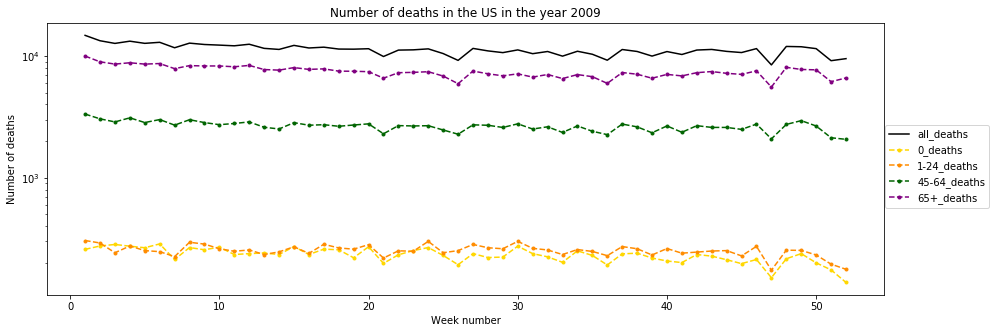

In [26]:
plot_total_deaths_per_week_by_year(2009, ['PI_deaths', '25-44_deaths'])

In [27]:
def bar_total_deaths_per_week_by_year(year, exclude_age=[]):
    
    dy = dict_year[year].drop(columns=exclude_age).groupby(['week']).sum()
    dy4bars = dy.drop(columns=['PI_deaths', 'all_deaths'])
    dy4plot = dy.loc[:,['PI_deaths', 'all_deaths']]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    ax.plot(dy4plot.index, dy4plot['all_deaths'], linestyle='-', marker='.', color='black', label='all_deaths')
    ax.plot(dy4plot.index, dy4plot['PI_deaths'], marker='', linestyle='-', color='red', label='PI_deaths')
    
    for c, col in enumerate(dy4bars.columns):
        ax.bar(dy4bars.index, dy4bars[col], bottom=dy4bars.iloc[:,0:c].sum(axis=1), alpha=0.5, color=colours_dict[col], label=col)
    
    ax.set(title='Number of deaths in the US in the year {}'.format(year), 
           xlabel='Week number', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    
    plt.show()

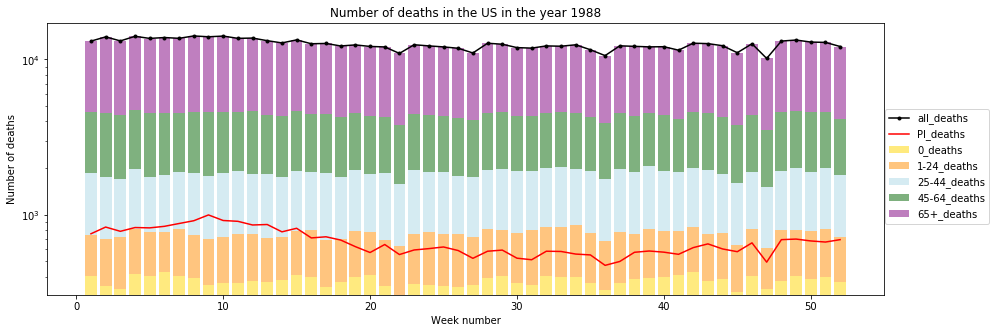

In [28]:
bar_total_deaths_per_week_by_year(1988, exclude_age=[])

In [29]:
def plot_total_deaths_per_week_by_year_compare(years=[], exclude_age=[]):

    if years == []:
        print('The argument "years" must be a non-empty list.')
        
    elif(len(years) == 1):
        print('If you are interested in a single year, use plot_total_deaths_per_week_by_year instead.')
        
    else:
        fig, ax = plt.subplots(len(years),1, sharey=True)
        fig.set_size_inches(15,5*len(years))
                
        for y, year in enumerate(years):
            dy = dict_year[year].drop(columns=exclude_age).groupby(['week']).sum()
            for col in dy.columns:
                if col == 'all_deaths':
                    ax[y].plot(dy.index, dy[col], linestyle='-', color='black', label=col)
                elif col == 'PI_deaths':
                    ax[y].plot(dy.index, dy[col], marker='', linestyle='-', color='red', label=col)
                else:
                    ax[y].plot(dy.index, dy[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

            ax[y].set(title='Number of deaths in the US in the year {}'.format(year), 
                      xlabel='Week number', ylabel='Number of deaths')
            
        plt.yscale('log')
        
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        fig.legend(by_label.values(), by_label.keys(), loc='right')
        
        plt.show()

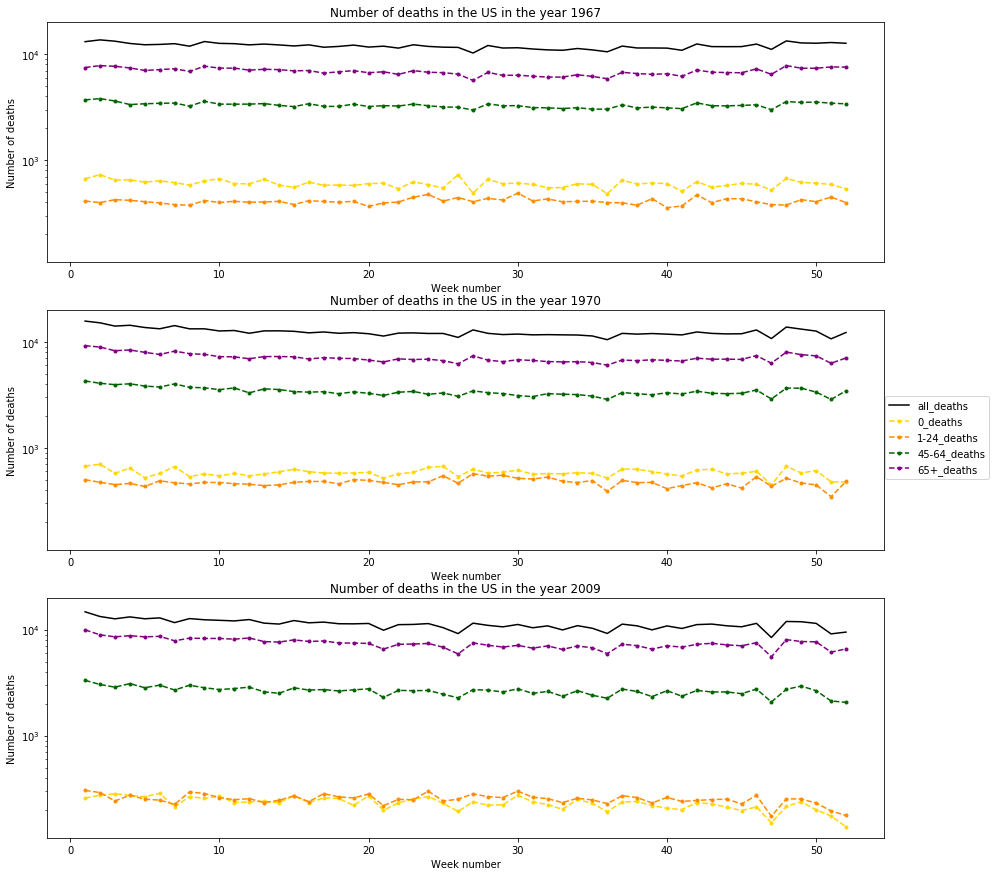

In [30]:
plot_total_deaths_per_week_by_year_compare([1967, 1970, 2009], ['PI_deaths', '25-44_deaths'])

## Plotting total deaths per year in a given city, possibly excluding some columns

In [31]:
def plot_total_deaths_per_year_by_city(city, exclude_age=[]):
    dc = dict_city[city].drop(columns=exclude_age).groupby(['year']).sum()
    fig, ax = plt.subplots()
    
    fig.set_size_inches(15,6)
    for col in dc.columns:
        if col == 'all_deaths':
            ax.plot(dc.index, dc[col], linestyle='-', color='black', label=col)
        elif col == 'PI_deaths':
            ax.plot(dc.index, dc[col], marker='', linestyle='-', color='red', label=col)
        else:
            ax.plot(dc.index, dc[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

    ax.set(title='Number of deaths in {} between 1962 and 2016'.format(city), 
           xlabel='Year', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    plt.show()

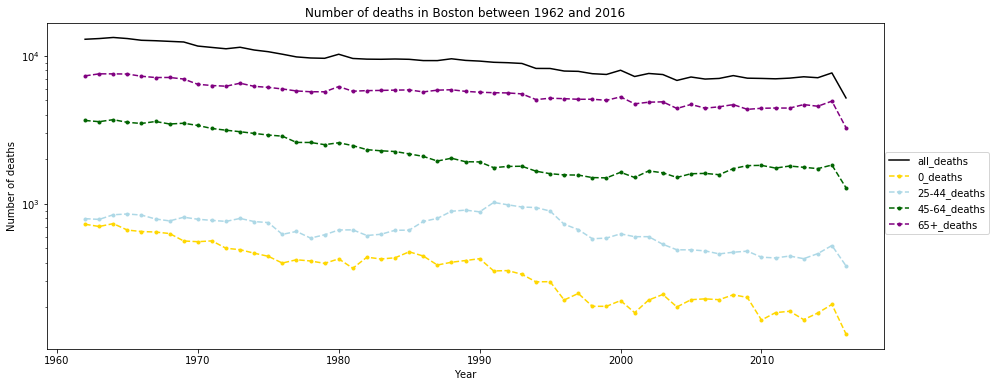

In [32]:
plot_total_deaths_per_year_by_city('Boston',['PI_deaths', '1-24_deaths'])

In [33]:
def bar_total_deaths_per_year_by_city(city, exclude_age=[]):
    
    dc = dict_city[city].drop(columns=exclude_age).groupby(['year']).sum()
    dc4bars = dc.drop(columns=['PI_deaths', 'all_deaths'])
    dc4plot = dc.loc[:,['PI_deaths', 'all_deaths']]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    ax.plot(dc4plot.index, dc4plot['all_deaths'], linestyle='-', marker='.', color='black', label='all_deaths')
    ax.plot(dc4plot.index, dc4plot['PI_deaths'], linestyle='-', marker='', color='red', label='PI_deaths')
    
    for c, col in enumerate(dc4bars.columns):
        ax.bar(dc4bars.index, dc4bars[col], bottom=dc4bars.iloc[:,0:c].sum(axis=1), alpha=0.5, color=colours_dict[col], label=col)
    
    ax.set(title='Number of deaths in {} between 1962 and 2016'.format(city), 
           xlabel='Year', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    
    plt.show()

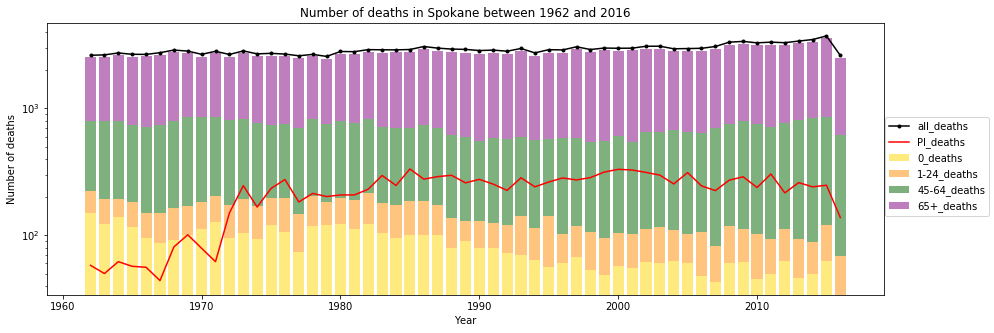

In [34]:
bar_total_deaths_per_year_by_city('Spokane', exclude_age=['25-44_deaths'])

In [35]:
def plot_total_deaths_per_year_by_city_compare(cities=[], exclude_age=[]):
    if cities == []:
        print('The argument "cities" must be a non-empty list.')
    else:
        fig, ax = plt.subplots(len(cities),1, sharey=True)
        fig.set_size_inches(15,5*len(cities))
        
        for c, city in enumerate(cities):
            dc = dict_city[city].drop(columns=exclude_age).groupby(['year']).sum()
            for col in dc.columns:
                if col == 'all_deaths':
                    ax[c].plot(dc.index, dc[col], linestyle='-', color='black', label=col)
                elif col == 'PI_deaths':
                    ax[c].plot(dc.index, dc[col], marker='', linestyle='-', color='red', label=col)
                else:
                    ax[c].plot(dc.index, dc[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

            ax[c].set(title='Number of deaths in {} between 1962 and 2016'.format(city), 
                      xlabel='Year', ylabel='Number of deaths')
            
        plt.yscale('log')
        
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        fig.legend(by_label.values(), by_label.keys(), loc='right')

        plt.show()

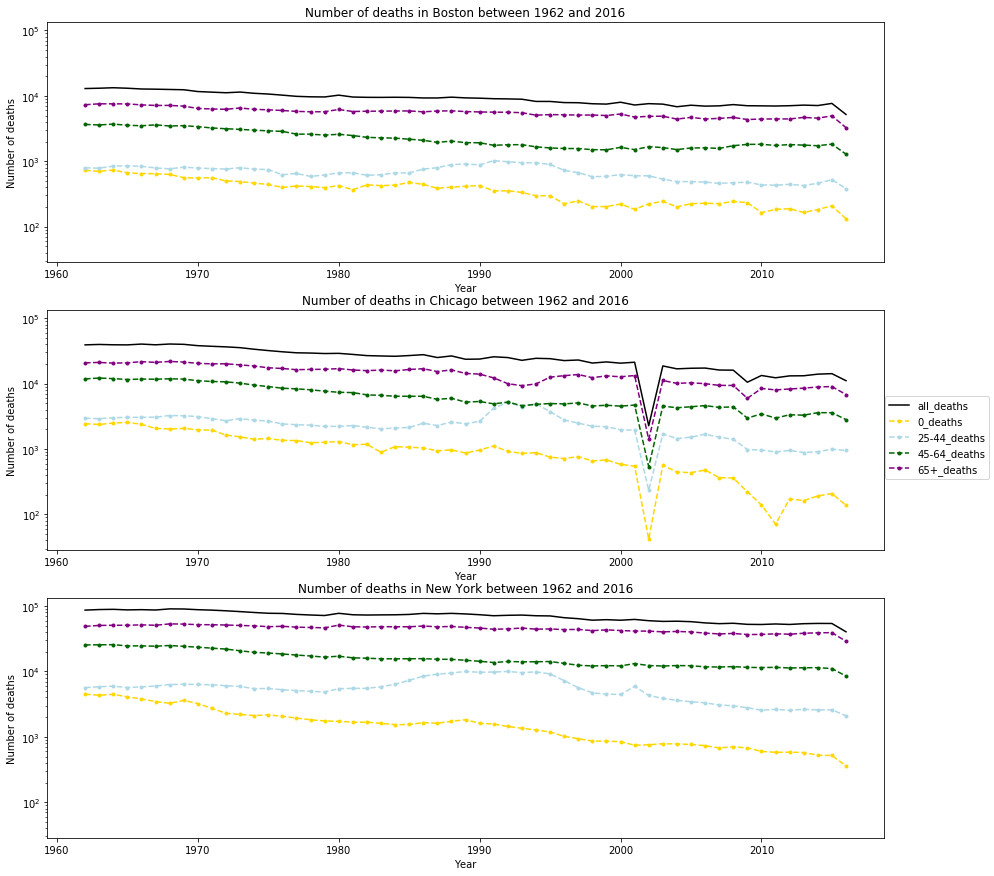

In [36]:
plot_total_deaths_per_year_by_city_compare(['Boston', 'Chicago', 'New York'], ['PI_deaths', '1-24_deaths'])

Chicago shows some funny trends to better analyse:
* 1991-1995 there are significantly more deaths in the 1-24 age group than before or after
* 2002 there's a very suspicious drop. Maybe some NaNs, although it's very consistent for all age groups. So maybe just an anomaly of some kind.

## Plotting total deaths per year in a given state, possibly excluding some columns

We might be interested in looking at the number of deaths in a given state aggregating the figures of all cities in that state. Comparing plots among different states is in general not meaningful, both because different states have different populations (and we don't have the total population data to introduce some normalised metric), and also because our DataFrame doesn't represent all states equally: MA has nine cities, IL has three, NM and AR have one. Nevertheless we write the function for comparisons as an exercise.

In [37]:
df.state.unique()

array(['MA', 'CT', 'NJ', 'NY', 'IN', 'RI', 'PA', 'OH', 'IL', 'MI', 'WI',
       'IA', 'MN', 'KS', 'MO', 'NE', 'GA', 'MD', 'NC', 'FL', 'VA', 'DC',
       'DE', 'AL', 'TN', 'KY', 'TX', 'LA', 'AR', 'OK', 'CA', 'NM', 'ID',
       'CO', 'NV', 'UT', 'AZ', 'HI', 'OR', 'WA'], dtype=object)

In [38]:
def plot_total_deaths_per_year_by_state(state, exclude_age=[]):
    
    subdf = df[df['state'] == state].drop(columns=exclude_age)
    
    ds = subdf.groupby(['year']).sum()
    fig, ax = plt.subplots()
    
    fig.set_size_inches(15,6)
    for col in ds.columns:
        if col == 'all_deaths':
            ax.plot(ds.index, ds[col], linestyle='-', color='black', label=col)
        elif col == 'PI_deaths':
            ax.plot(ds.index, ds[col], marker='', linestyle='-', color='red', label=col)
        else:
            ax.plot(ds.index, ds[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

    ax.set(title='Number of deaths in {} ('.format(state) + ', '.join(subdf.city.unique()) + ') between 1962 and 2016', 
           xlabel='Year', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    plt.show()

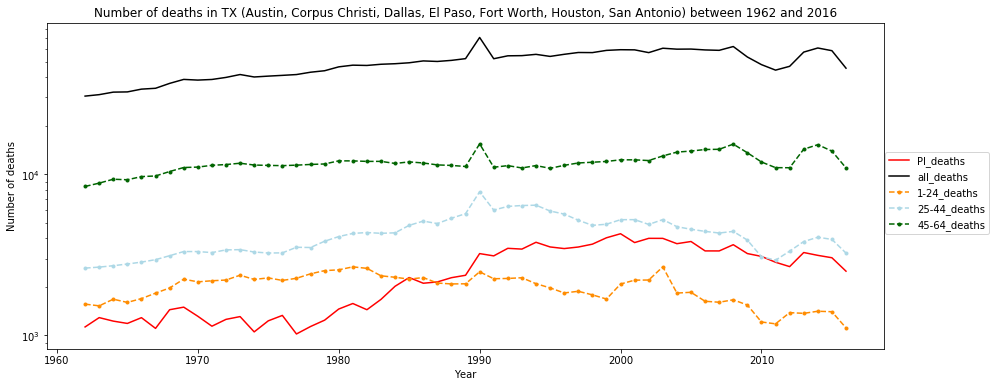

In [39]:
plot_total_deaths_per_year_by_state('TX', exclude_age=['0_deaths', '65+_deaths'])

In [40]:
def bar_total_deaths_per_year_by_state(state, exclude_age=[]):
    
    subdf = df[df.state == state].drop(columns=exclude_age)
    
    ds = subdf.groupby(['year']).sum()
    ds4bars = ds.drop(columns=['PI_deaths', 'all_deaths'])
    ds4plot = ds.loc[:,['PI_deaths', 'all_deaths']]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    ax.plot(ds4plot.index, ds4plot['all_deaths'], linestyle='-', marker='.', color='black', label='all_deaths')
    ax.plot(ds4plot.index, ds4plot['PI_deaths'], linestyle='-', marker='', color='red', label='PI_deaths')
    
    for c, col in enumerate(ds4bars.columns):
        ax.bar(ds4bars.index, ds4bars[col], bottom=ds4bars.iloc[:,0:c].sum(axis=1), alpha=0.5, color=colours_dict[col], label=col)
    
    ax.set(title='Number of deaths in {} between 1962 and 2016'.format(state), 
           xlabel='Year', ylabel='Number of deaths')
    plt.yscale('log')
    fig.legend(loc='right')
    
    plt.show()

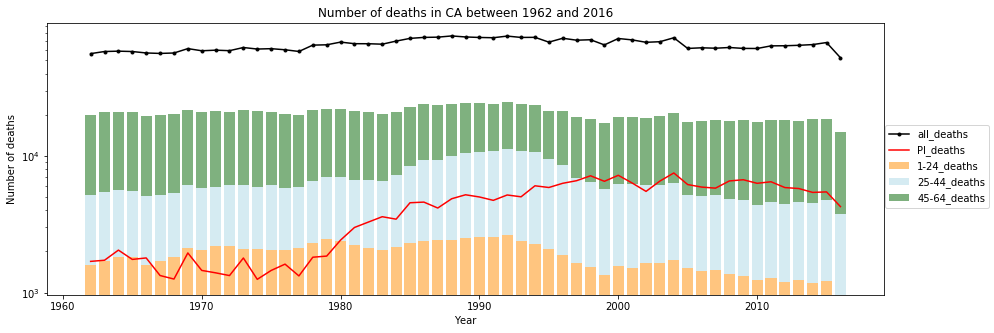

In [41]:
bar_total_deaths_per_year_by_state('CA', exclude_age=['0_deaths', '65+_deaths'])

In [42]:
def plot_total_deaths_per_year_by_state_compare(states=[], exclude_age=[]):
    if states == []:
        print('The argument "states" must be a non-empty list.')
    else:
        subdf = df[df['state'].isin(states)].drop(columns=exclude_age)
        
        fig, ax = plt.subplots(len(states),1, sharey=True)
        fig.set_size_inches(15,5*len(states))
        
        for s, state in enumerate(states):
            ds = subdf[subdf['state'] == state].groupby(['year']).sum()
            for col in ds.columns:
                if col == 'all_deaths':
                    ax[s].plot(ds.index, ds[col], linestyle='-', color='black', label=col)
                elif col == 'PI_deaths':
                    ax[s].plot(ds.index, ds[col], marker='', linestyle='-', color='red', label=col)
                else:
                    ax[s].plot(ds.index, ds[col], linestyle='--', marker='.', color=colours_dict[col], label=col)

            ax[s].set(title='Number of deaths in {} ('.format(state) + ', '.join(subdf[subdf.state == state].city.unique()) + ') between 1962 and 2016', 
                      xlabel='Year', ylabel='Number of deaths')
            
        plt.yscale('log')
        
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        fig.legend(by_label.values(), by_label.keys(), loc='right')

        plt.show()

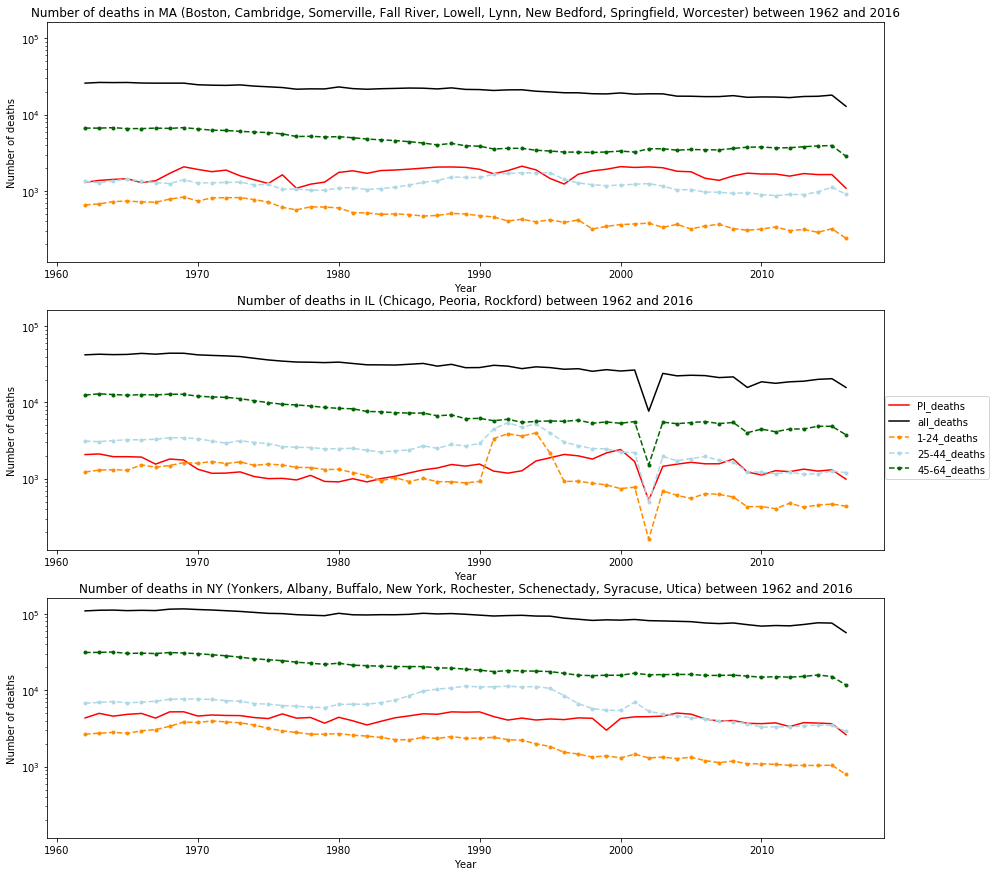

In [43]:
plot_total_deaths_per_year_by_state_compare(['MA', 'IL', 'NY'], ['0_deaths', '65+_deaths'])

## Plotting the incidence of pneumonia/influenza deaths over time.

Introduce DataFrames displaying - for each year and for each state/city - the number of PI deaths and the total number of deaths. 

Add columns to both with the ratio of the two, the national average in that year, the relative difference between the local incidence rate and the national average.

In [44]:
df_PI_incidence_by_state = df.groupby(['year', 'state']).sum().loc[:,['PI_deaths', 'all_deaths']]
df_PI_incidence_by_city = df.groupby(['year', 'city', 'state']).sum().loc[:,['PI_deaths', 'all_deaths']]

In [45]:
# This functions compute the US or state average in a given year
# I also create dictionaries storing the values of the average functions for all the years (or the pairs (year,state)) of interest 
# The state average dictionary takes a bit to compute, but it's worth it.

def US_avg(year):
    PI_vs_all = df.loc[df['year'] == year, ['PI_deaths', 'all_deaths']].sum()
    
    return PI_vs_all[0]/PI_vs_all[1]

# Obviously the state average is meaningless if only one city from that state is included in the DataFrame. 
# Let's list the cities that are the only representatives from their state.

tmp = df.groupby(['state', 'city']).sum()
one_city_states = [ind[0] for ind in tmp.index if tmp.loc[pd.IndexSlice[ind[0],:],:].shape[0] == 1]
del tmp

def state_avg(year, state):
    if state in one_city_states:
        return np.nan
    else:
        PI_vs_all = df.loc[(df['state'] == state) & (df['year'] == year), ['PI_deaths', 'all_deaths']].sum()
        if PI_vs_all[1] != 0:
            return PI_vs_all[0]/PI_vs_all[1]
        else:
            return np.nan      
        
yearly_US_avg_dict = {y:US_avg(y) for y in range(1962, 2017)}
yearly_state_avg_dict = {(y,s):state_avg(y,s) for s in df.state.unique() for y in range(1962, 2017)}

In [46]:
# Add to the two PI_incidence DataFrames the column for the yearly incidence of PI_deaths in each state/city

df_PI_incidence_by_state = df_PI_incidence_by_state.assign(ratio = df_PI_incidence_by_state['PI_deaths']/df_PI_incidence_by_state['all_deaths'])
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(ratio = df_PI_incidence_by_city['PI_deaths']/df_PI_incidence_by_city['all_deaths'])

# Add to both the PI_incidence DataFrames the column with the national average and that with the state average to the latter
# (note that using the dictionary avoids recomputing the national average dozens of time for each year, which saves considerable time)

df_PI_incidence_by_state = df_PI_incidence_by_state.assign(US_avg = df_PI_incidence_by_state.index.get_level_values(0).map(yearly_US_avg_dict))
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(US_avg = df_PI_incidence_by_city.index.get_level_values(0).map(yearly_US_avg_dict))
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(state_avg = df_PI_incidence_by_city.index.droplevel(1).map(yearly_state_avg_dict))

# Yet the last columns with the relative difference between the local incidence and the US average and the state average.

df_PI_incidence_by_state = df_PI_incidence_by_state.assign(US_rel_diff = (df_PI_incidence_by_state['ratio'] - df_PI_incidence_by_state['US_avg'])/df_PI_incidence_by_state['US_avg'])
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(US_rel_diff = (df_PI_incidence_by_city['ratio'] - df_PI_incidence_by_city['US_avg'])/df_PI_incidence_by_city['US_avg'])
df_PI_incidence_by_city = df_PI_incidence_by_city.assign(state_rel_diff = (df_PI_incidence_by_city['ratio'] - df_PI_incidence_by_city['state_avg'])/df_PI_incidence_by_city['state_avg'])

df_PI_incidence_by_state
df_PI_incidence_by_city


PI_deaths  all_deaths     ratio    US_avg  US_rel_diff
year state                                                        
1962 AL         293.0      8795.0  0.033314  0.039437    -0.155254
     AR         244.0      3197.0  0.076322  0.039437     0.935269
     AZ         225.0      6885.0  0.032680  0.039437    -0.171347
     CA        1693.0     56118.0  0.030169  0.039437    -0.235022
     CO         471.0      8027.0  0.058677  0.039437     0.487859
...               ...         ...       ...       ...          ...
2016 TX        2505.0     45468.0  0.055094  0.063225    -0.128605
     UT         538.0      7435.0  0.072360  0.063225     0.144497
     VA         152.0      3698.0  0.041103  0.063225    -0.349885
     WA         556.0      8037.0  0.069180  0.063225     0.094193
     WI         118.0      3295.0  0.035812  0.063225    -0.433578

[2129 rows x 5 columns]

PI_deaths  all_deaths     ratio    US_avg  state_avg  \
year city        state                                                         
1962 Akron       OH          40.0      2920.0  0.013699  0.039437   0.026617   
     Albany      NY          65.0      2331.0  0.027885  0.039437   0.039596   
     Albuquerque NM         134.0      1670.0  0.080240  0.039437        NaN   
     Allentown   PA          65.0      1810.0  0.035912  0.039437   0.033538   
     Atlanta     GA         226.0      6208.0  0.036405  0.039437   0.048250   
...                           ...         ...       ...       ...        ...   
2016 Wichita     KS         252.0      3636.0  0.069307  0.063225   0.070249   
     Wilimington DE          44.0       488.0  0.090164  0.063225        NaN   
     Worcester   MA         341.0      2412.0  0.141376  0.063225   0.084284   
     Yonkers     NY          57.0       684.0  0.083333  0.063225   0.045996   
     Youngstown  OH         108.0      2516.0  0.042925  0.063225   0.055482   

                        US_rel_diff  state_rel_diff  
year city        state                               
1962 Akron       OH       -0.652647       -0.485342  
     Albany      NY       -0.292925       -0.295757  
     Albuquerque NM        1.034616             NaN  
     Allentown   PA       -0.089397        0.070771  
     Atlanta     GA       -0.076895       -0.245500  
...                             ...             ...  
2016 Wichita     KS        0.096200       -0.013408  
     Wilimington DE        0.426087             NaN  
     Worcester   MA        1.236096        0.677381  
     Yonkers     NY        0.318050        0.811752  
     Youngstown  OH       -0.321068       -0.226322  

[6557 rows x 7 columns]

Now we can plot the trends in each state/city.
When plotting state (city) trends we will include the US (and state, if meaningful) average for comparison.

In [47]:
def plot_PI_states(states = []):
    
    l = len(states)

    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    
    ax.plot(list(yearly_US_avg_dict.keys()), [100 * x for x in list(yearly_US_avg_dict.values())], 
            linestyle = '-', marker='.', color = 'red', label='US avg')
    for st in states:
        data = df_PI_incidence_by_state.loc[pd.IndexSlice[:,st],:].droplevel(level=1)
        ax.plot(data.index, 100*data['ratio'], 
                linestyle = '-', marker='.', alpha=0.4 * (l<=5) + 0.2*(l>5), label=(st if l<=5 else None))
    
    if l == 0:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in the US between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')
        
    elif l <= 5:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in ' + ', '.join(states) + ' between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')
        
    else:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in numerous states between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='right')
    plt.show()

In [48]:
def plot_PI_cities(cities = []):
    
    l = len(cities)
#     Determine corresponding states, removing duplicates by passing through sets.
    corr_states = list(set([df.loc[df.loc[df['city'] == c].first_valid_index(),'state'] for c in cities]))
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)

    ax.plot(list(yearly_US_avg_dict.keys()), [100 * x for x in list(yearly_US_avg_dict.values())], 
            linestyle = '-', marker='.', color = 'red', label='US avg')
    if len(corr_states) == 1:
        if corr_states[0] not in one_city_states:
            ax.plot(list(yearly_US_avg_dict.keys()), [100 * yearly_state_avg_dict[(y, corr_states[0])] for y in range(1962, 2017)], 
                    linestyle = '-', marker='.', color = 'gray', label=corr_states[0]+' avg')
            str_for_legend = corr_states[0]
        else:
            str_for_legend = corr_states[0]
    else:
        str_for_legend = 'different states'
        
    for c in cities:
        data = df_PI_incidence_by_city.loc[pd.IndexSlice[:,c,:],:].droplevel(level=[1,2])
        ax.plot(data.index, 100*data['ratio'], 
                linestyle = '-', marker='.', alpha=0.4 * (l<=5) + 0.2*(l>5), label=(c if l<=5 else None))

    if l == 0:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in the US between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')
        
    elif l <= 5:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in ' + ', '.join(cities) + 
               ' (' + str_for_legend + ')' + ' between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')
        
    else:
        ax.set(title='Percentage of deaths caused by pneumonia/influenza in numerous cities in ' + str_for_legend + ' between 1962 and 2016', 
               xlabel='Year', ylabel='Percentage of PI deaths')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='right')
    plt.show()    

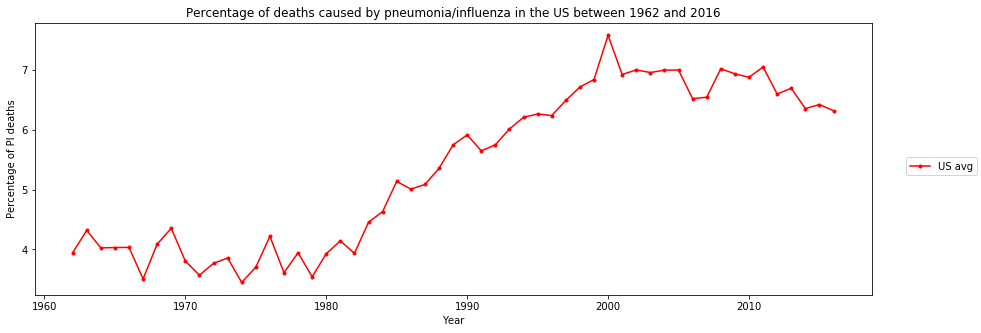

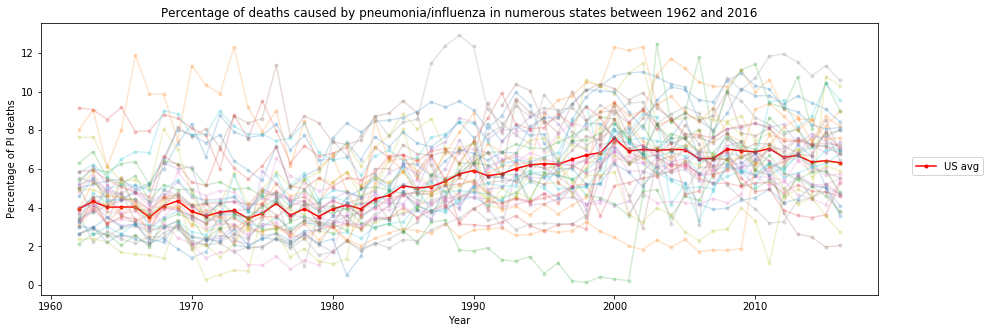

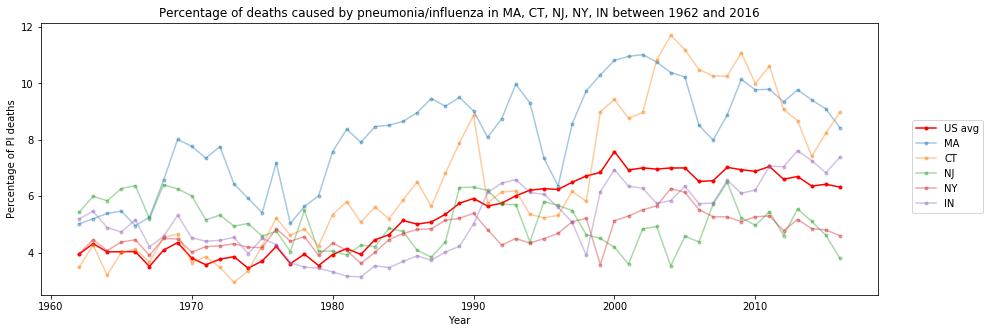

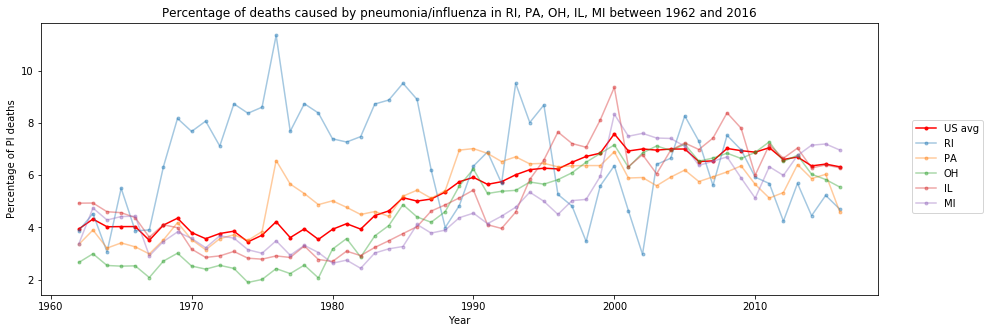

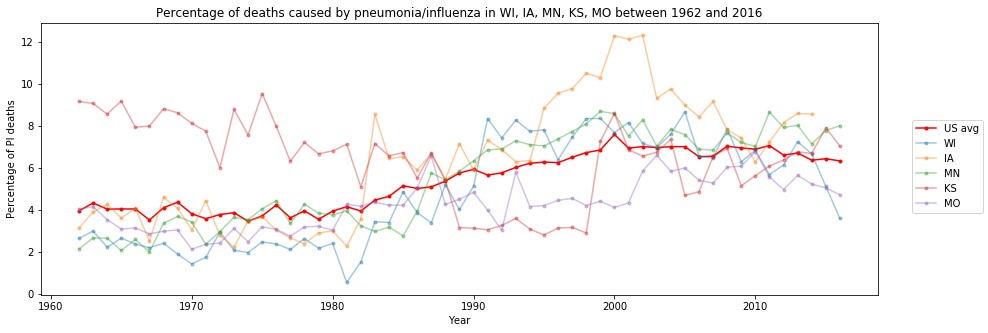

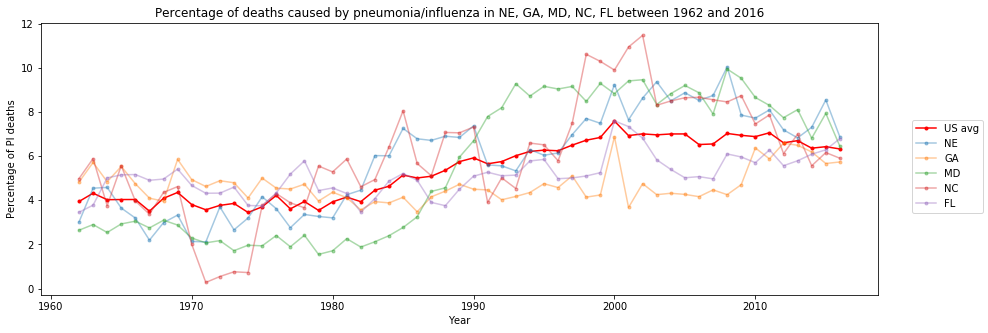

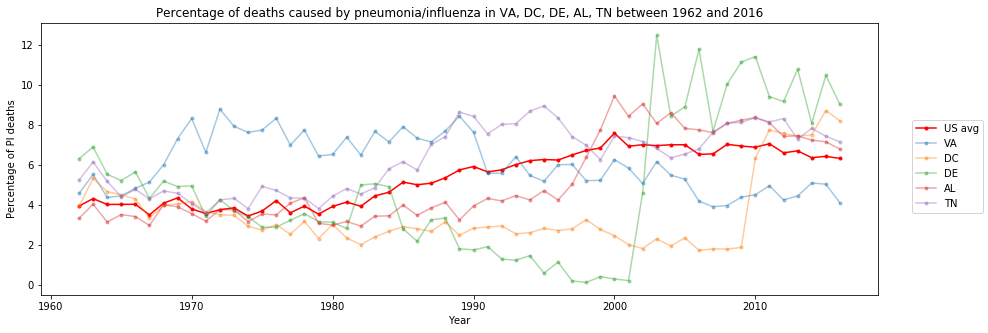

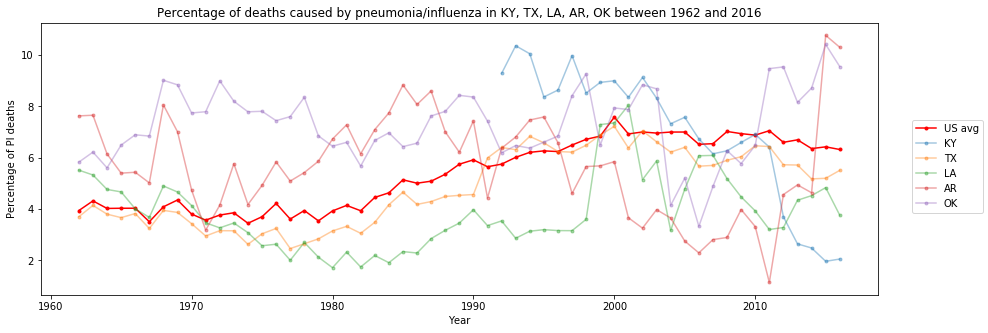

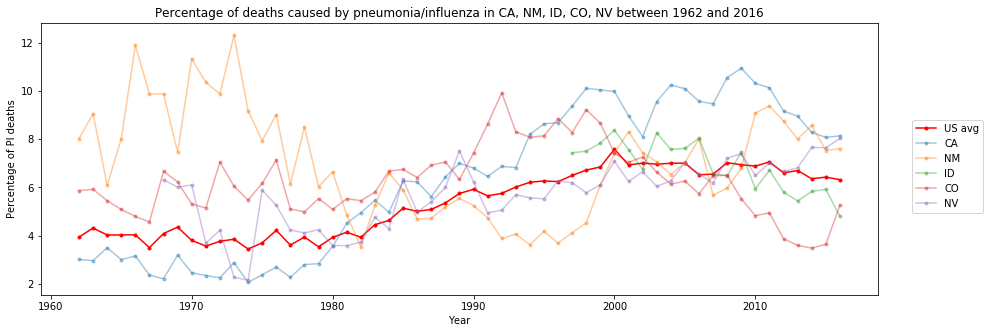

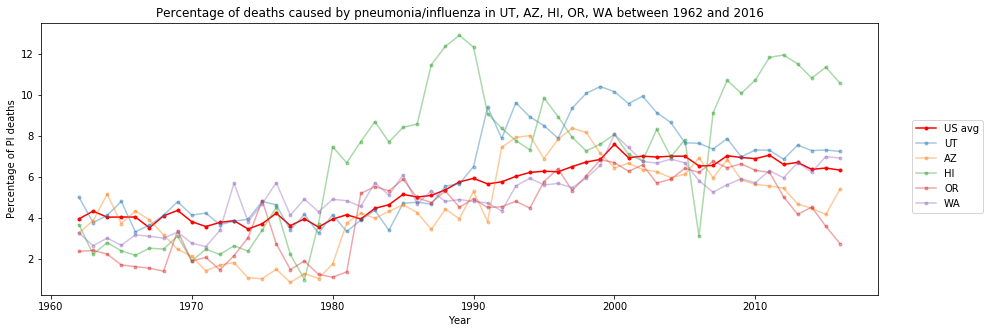

In [49]:
plot_PI_states()
plot_PI_states(df.state.unique())
for i in range(8):
    plot_PI_states(df.state.unique()[5*i:5*(i+1)])

Several states seem to have had significantly high fatality rates (compared to the national average) at different times -- e.g. MA, CT, IA peak in the early 2000s, NM in 1966 and 1973, RI in 1976. Let's make a list of these occurrences.
I want to see how much the yearly incidence of PI_deaths deviates from the national average and single out the worst instances. Let's first add the necessary extra columns to the relevant DataFrame.

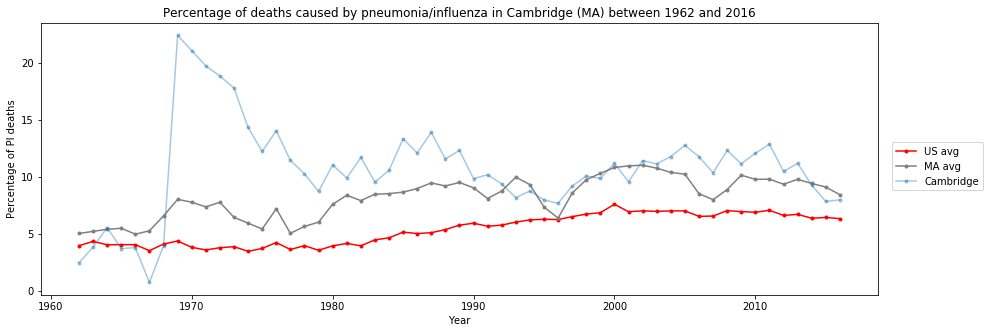

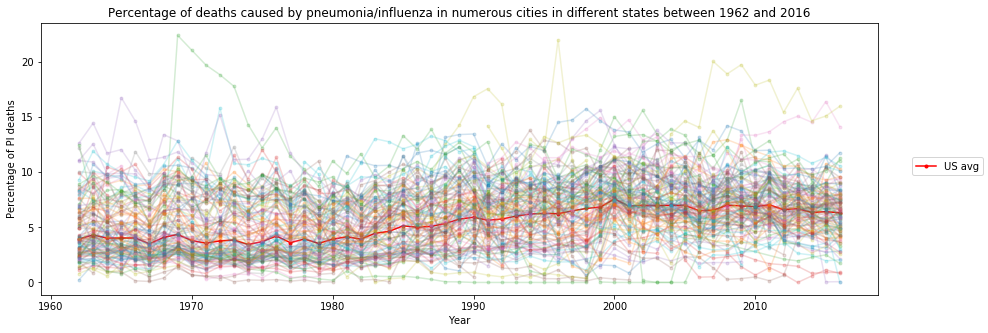

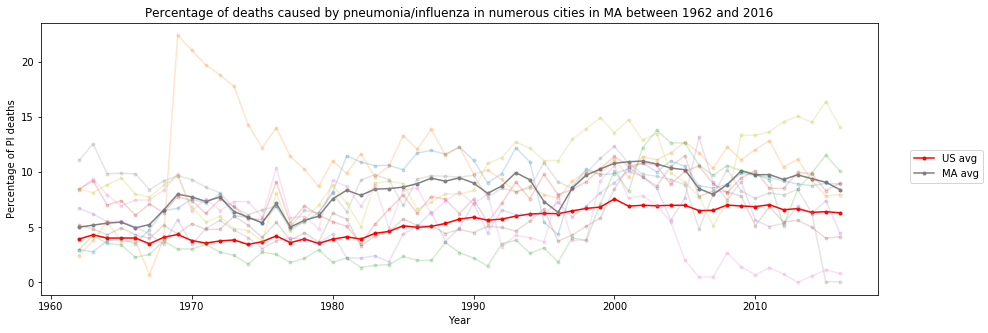

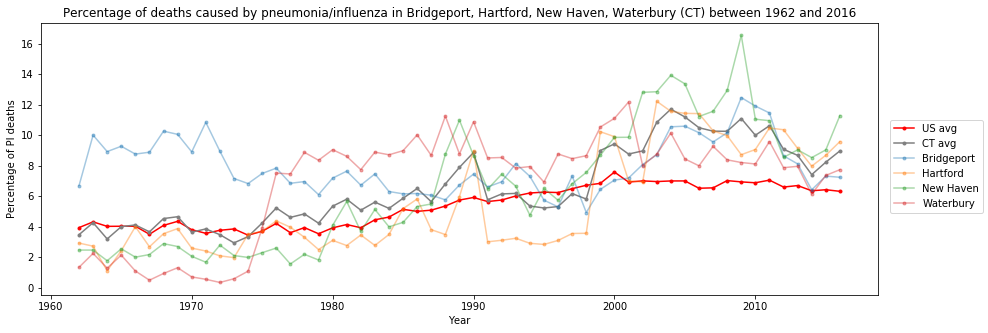

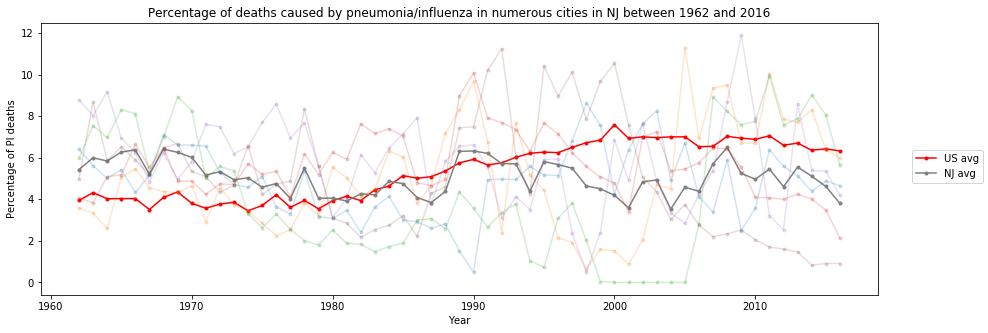

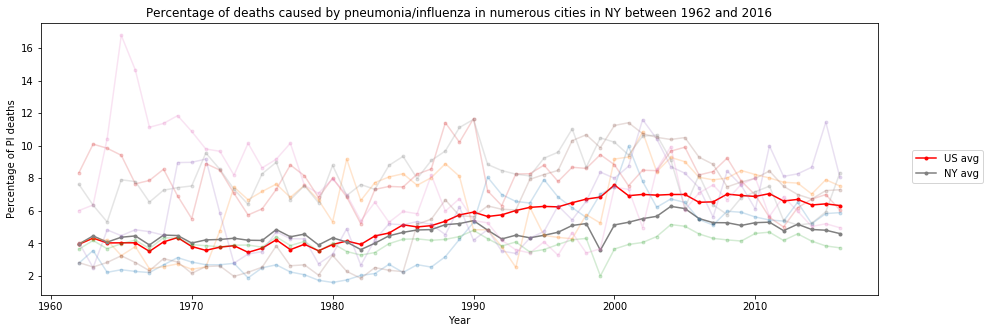

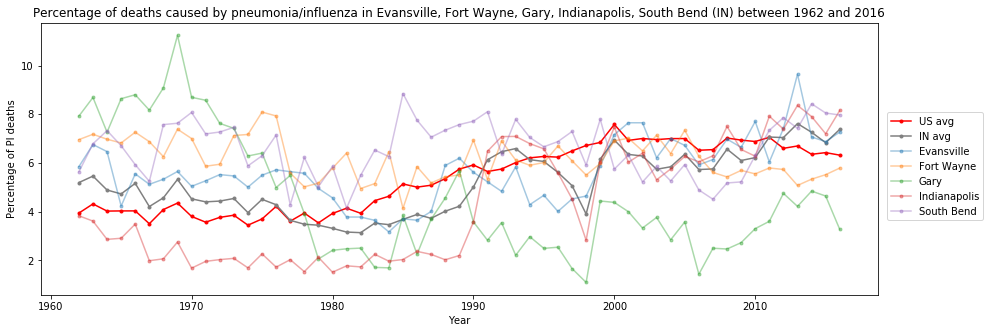

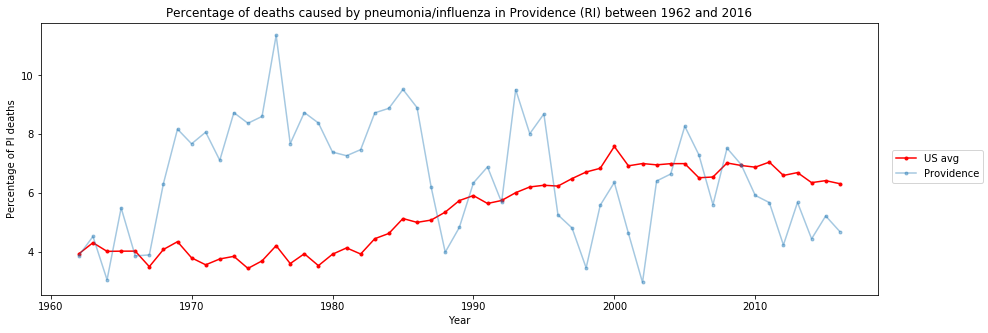

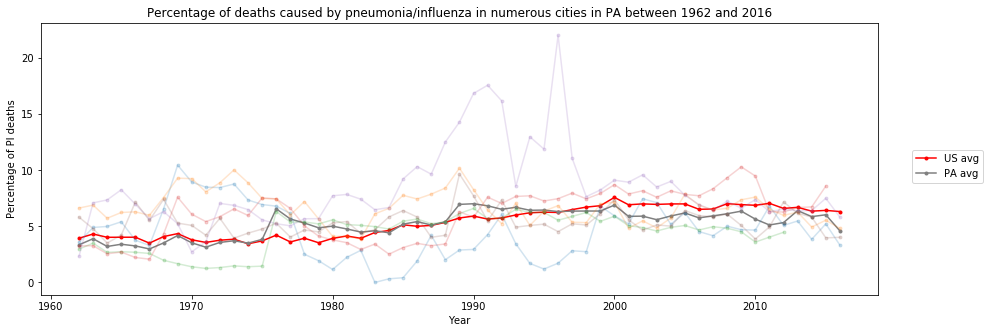

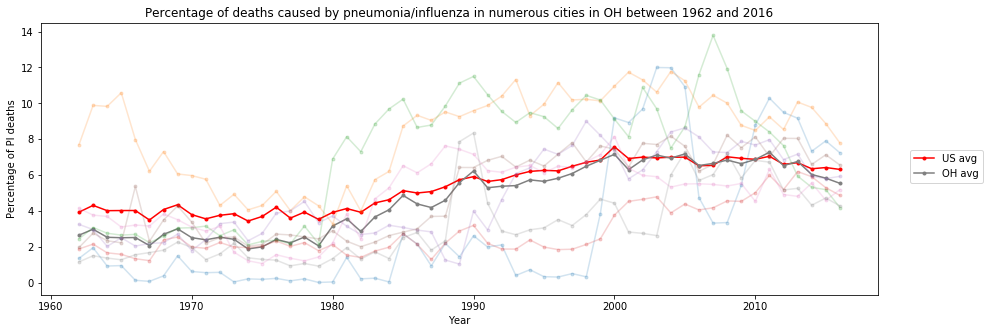

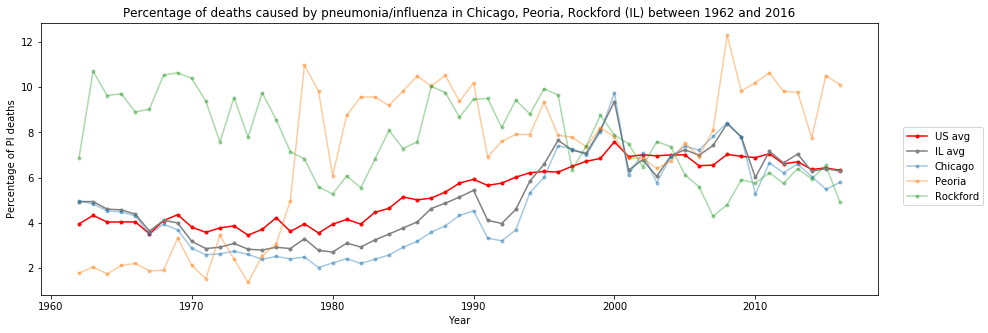

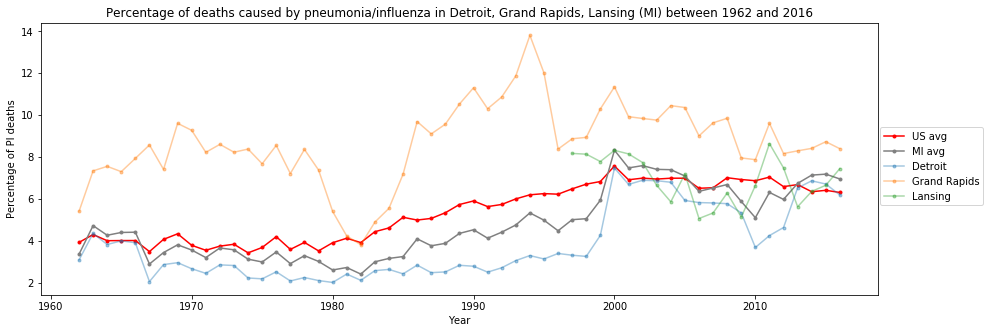

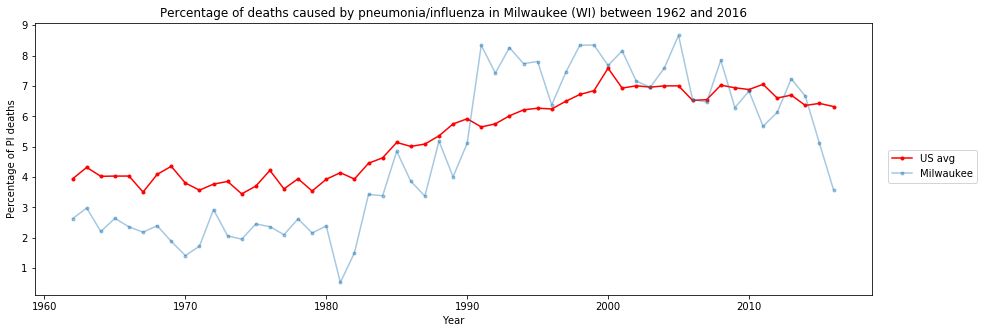

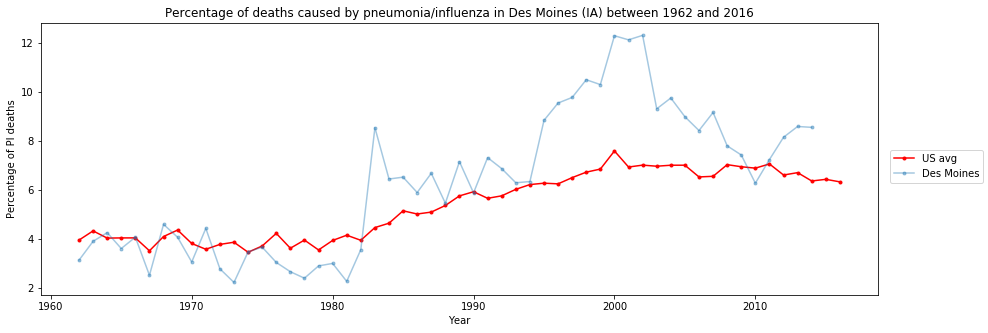

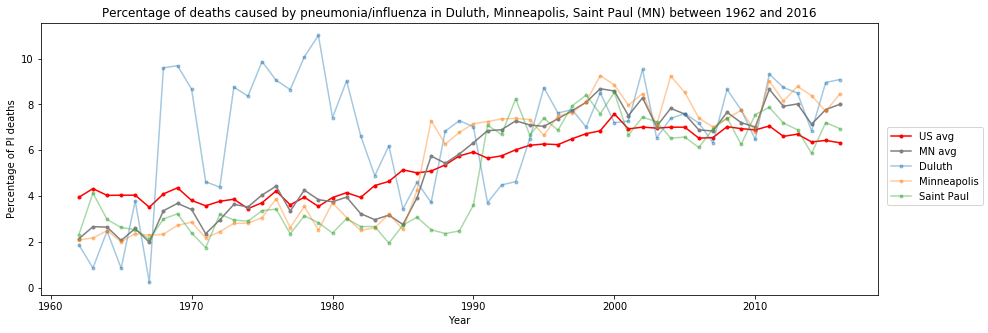

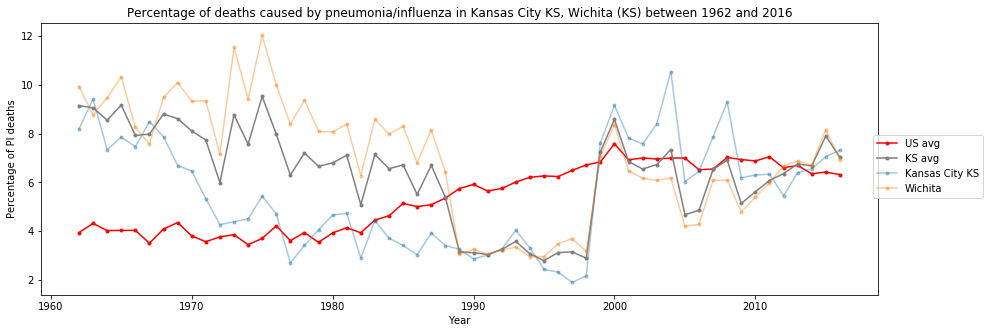

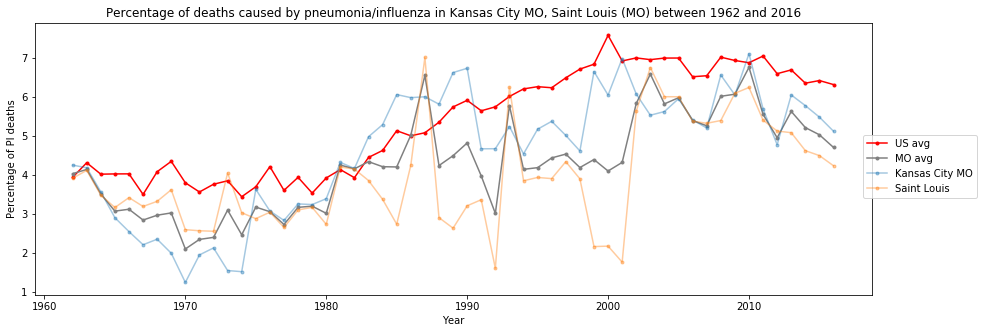

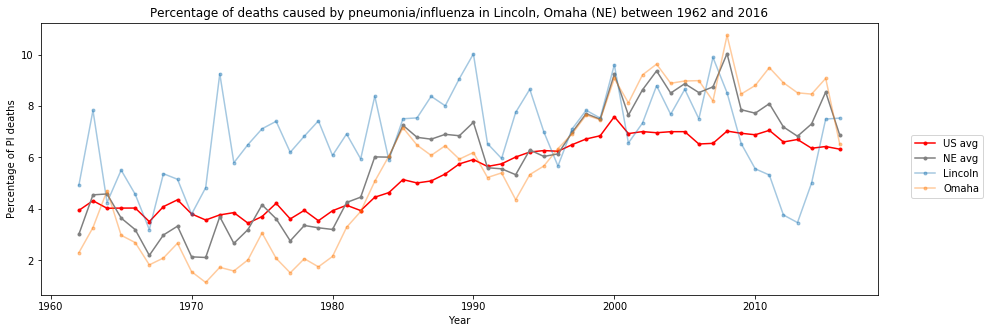

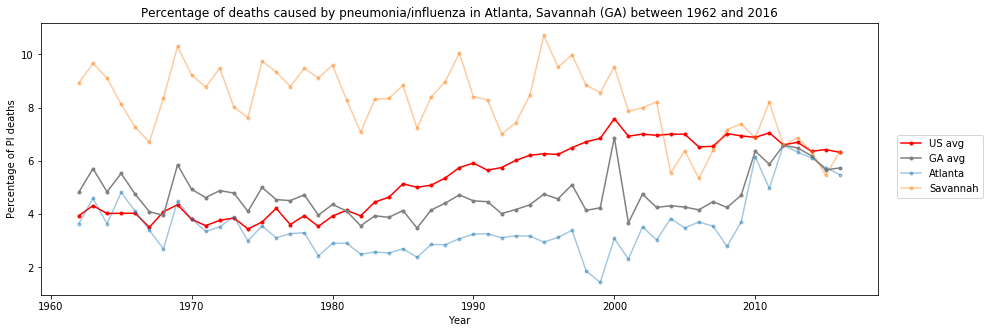

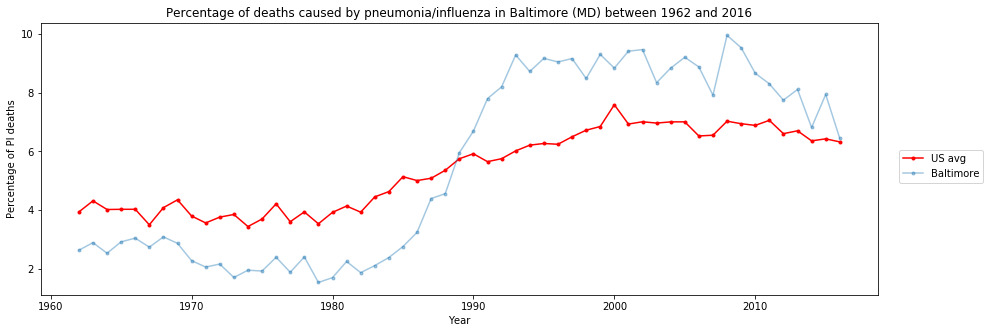

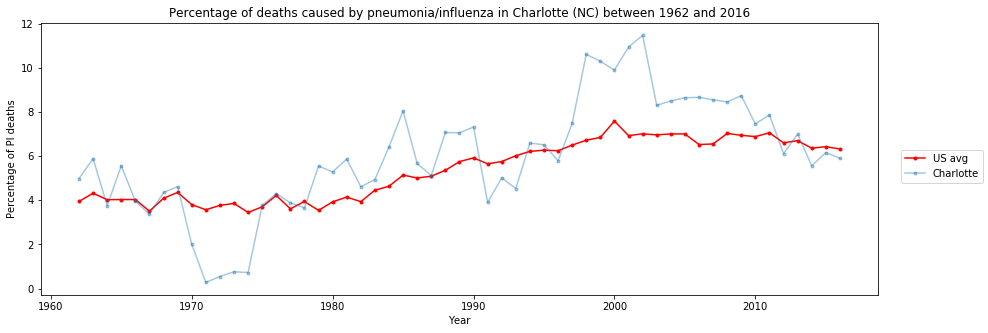

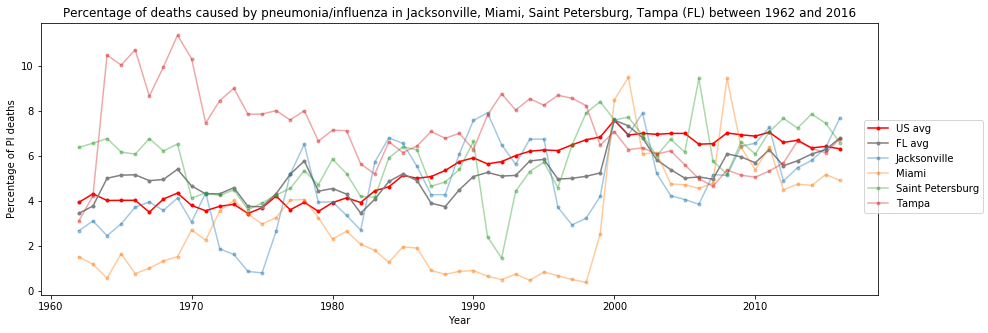

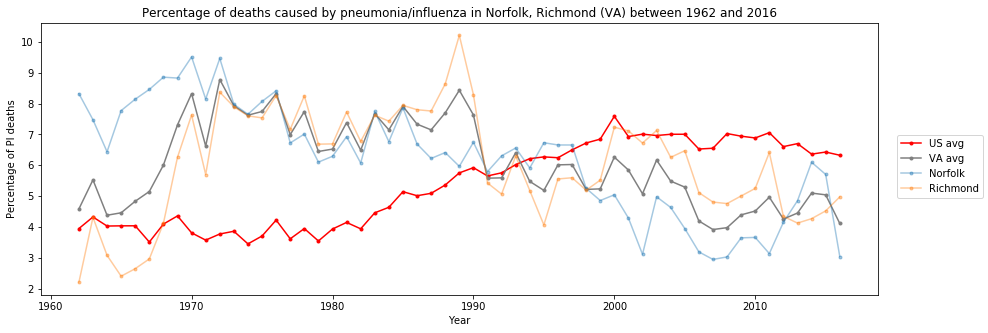

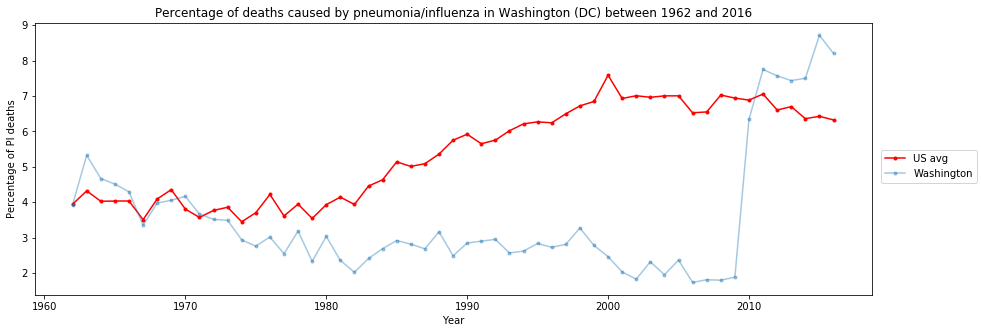

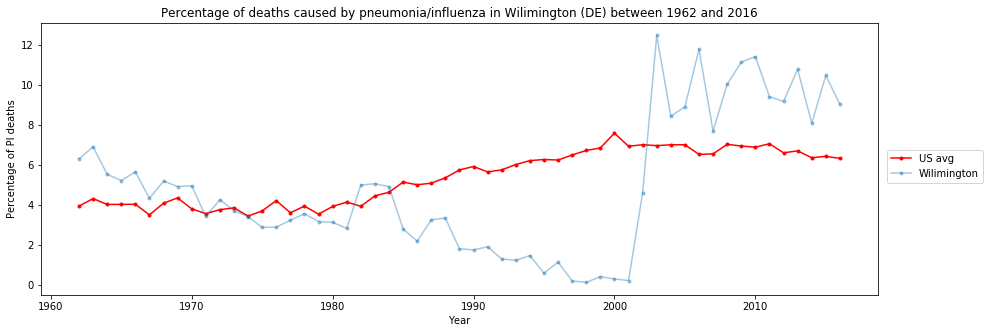

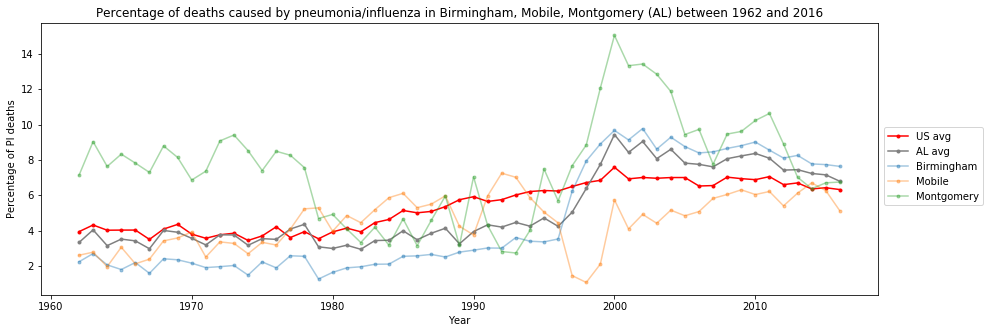

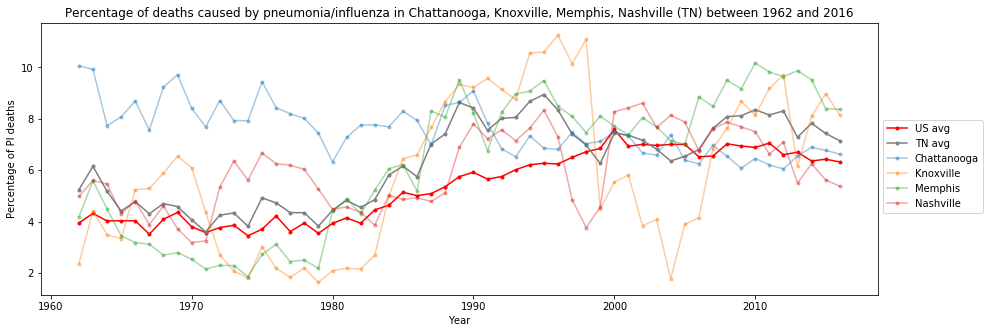

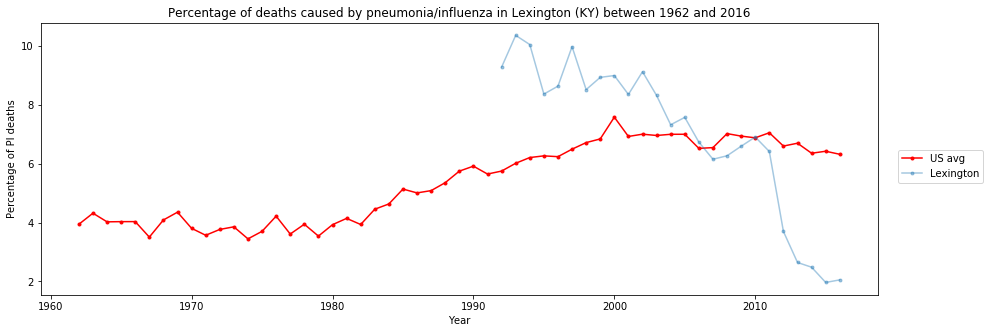

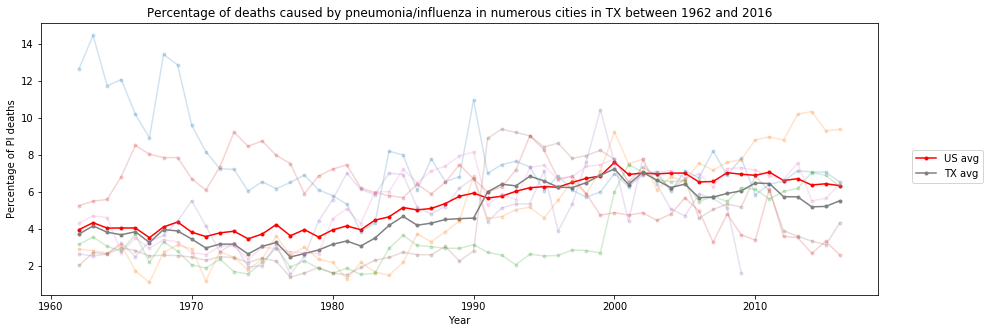

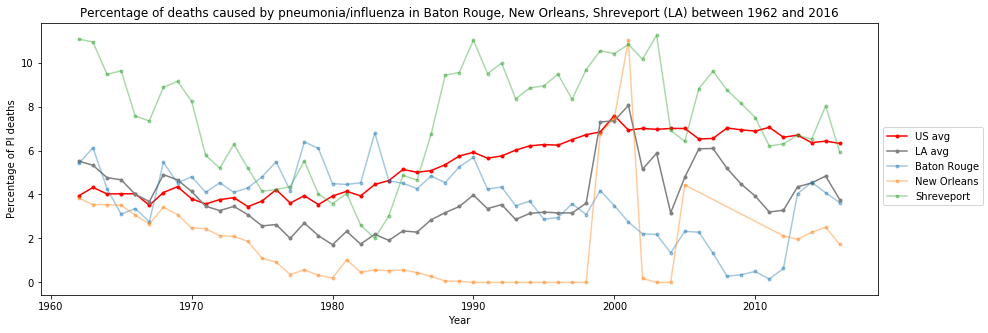

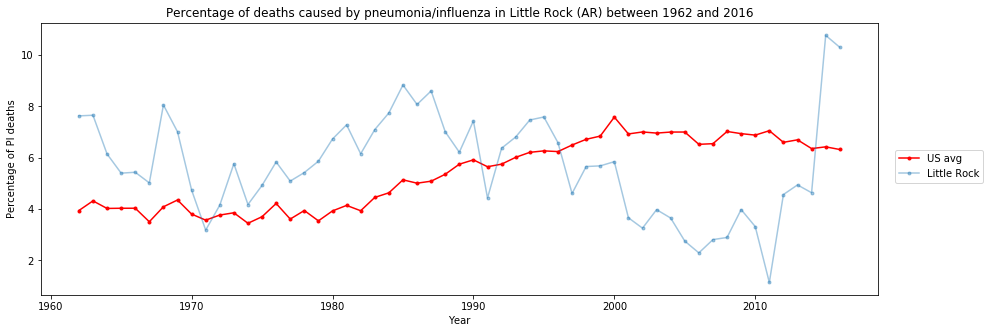

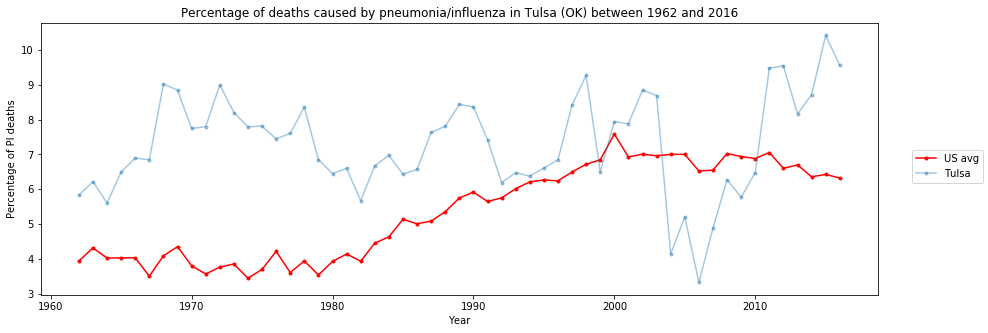

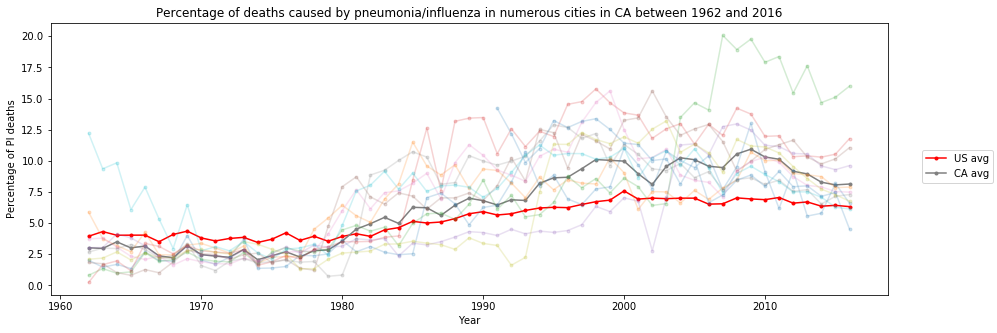

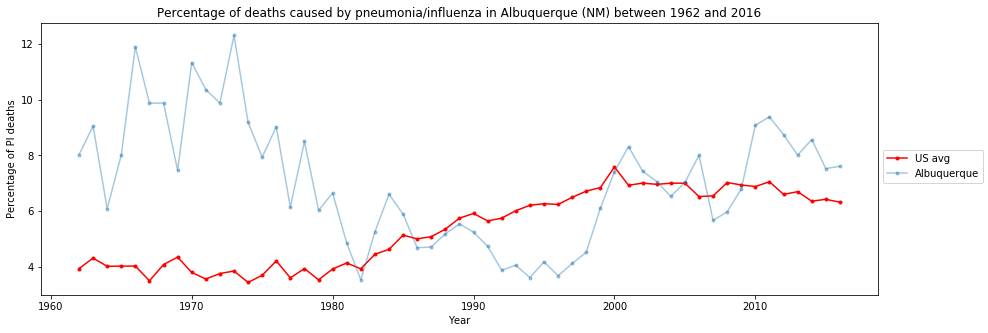

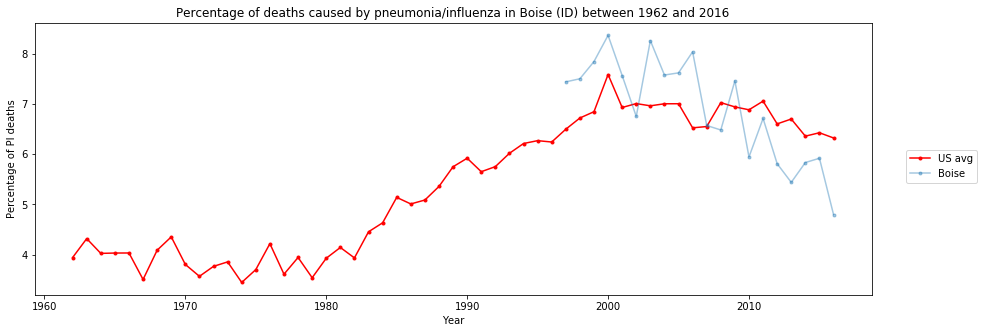

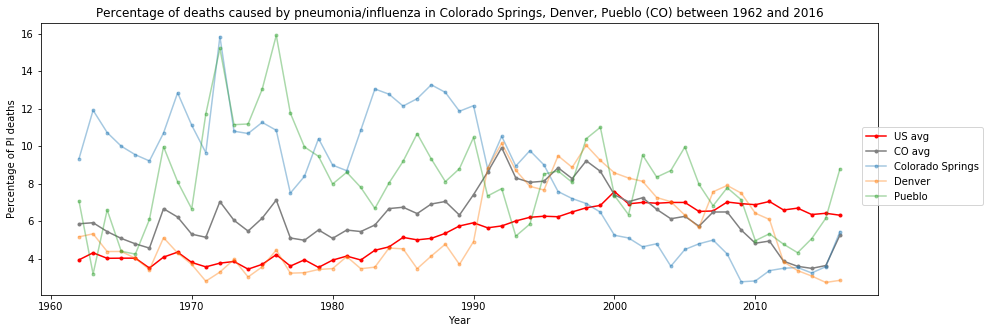

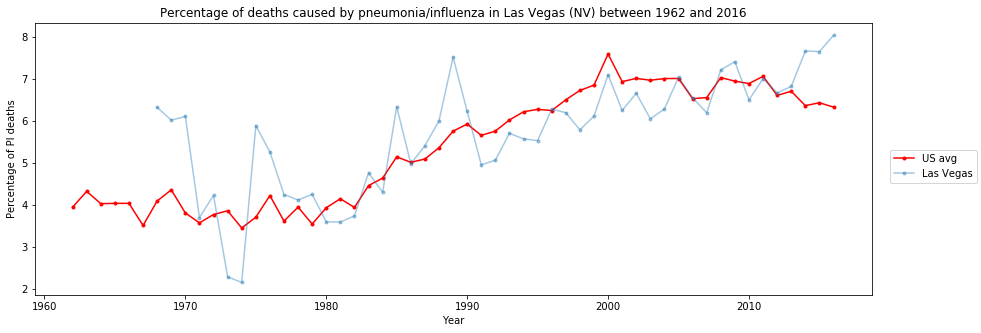

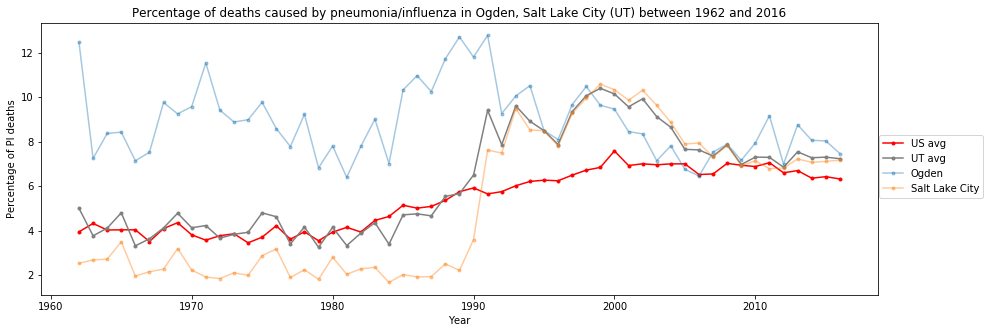

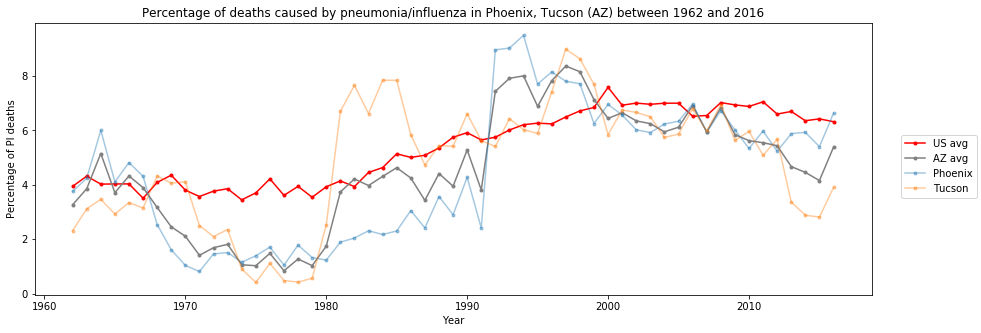

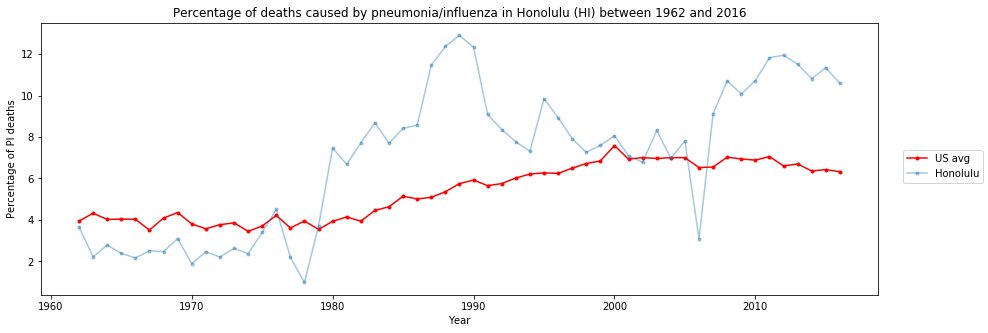

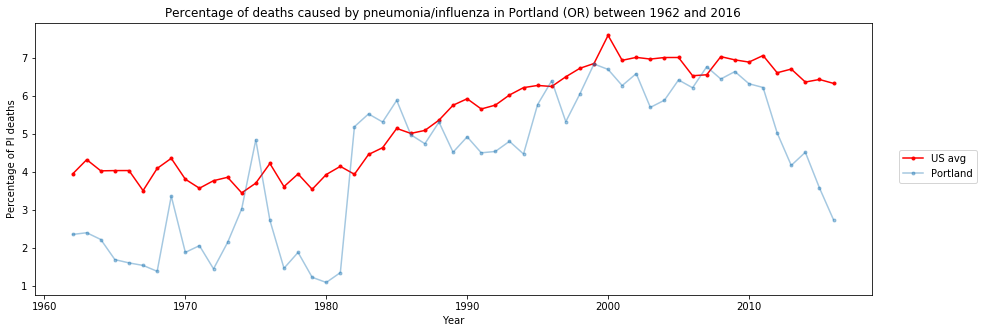

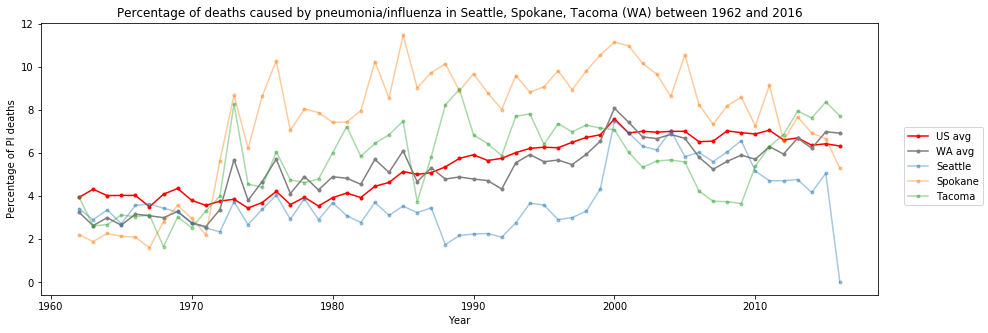

In [50]:
plot_PI_cities(['Cambridge'])
plot_PI_cities(df['city'].unique())
for st in df['state'].unique():
    cities_in_state = df.loc[df.state == st].groupby(['city']).sum().index
    plot_PI_cities(cities_in_state)

**Note**: the lines of the two Kansas City's now look plausible. Before lifting the ambiguity corrected at the top of the notebook, the same curve was drawn for both of them (due to the filtering in the plotting function), mixing both sets of data, resulting in very weird year-to-year fluctuations!

### Outliers

We look for outliers in the sense of the boxplots. Namely those states where the column *rel_diff* in a given year reads a value that lies outside the interval (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR), for Q1, Q3 the first and third quartiles, IQR = Q3 - Q1 the interquartile range. The factor multiplying IQR can be changed if desired.

In [51]:
def find_state_outliers(year, whiskers=1.5, boxplot=False, verbose=False):
    df_year = df_PI_incidence_by_state.loc[year]
    q1, q3 = df_year['US_rel_diff'].quantile(0.25), df_year['US_rel_diff'].quantile(0.75)
    pos_outliers = df_year.loc[df_year['US_rel_diff'] < q1 - whiskers*(q3-q1)]
    neg_outliers = df_year.loc[df_year['US_rel_diff'] > q3 + whiskers*(q3-q1)]
    
    if pos_outliers.empty:
        if verbose == True:
            print('Low incidence outliers in {}:'.format(year))
            print('\t' + 'No state was far below the national average.')
        else:
            pass
    else:
        print('Low incidence outliers in {}:'.format(year))
        for i in range(pos_outliers.shape[0]):
            print('\t' + 'Incidence in {0} was {1:.1f}% below the national average.'.format(pos_outliers.index[i], -100*pos_outliers.iloc[i,-1]))
        
    if neg_outliers.empty:
        if verbose == True:
            print('\n'+'High incidence outliers in {}:'.format(year))
            print('\t' + 'No state was far above the national average.')
        else:
            pass
    else:
        print('\n'+'High incidence outliers in {}:'.format(year))
        for i in range(neg_outliers.shape[0]):
            print('\t' + 'Incidence in {0} was {1:.1f}% above the national average.'.format(neg_outliers.index[i], 100*neg_outliers.iloc[i,-1]))
    
    if (not pos_outliers.empty or not neg_outliers.empty):
        print('\n--------------------------------------------------------------------------\n')
        
    if boxplot == True:
        fig, ax = plt.subplots()
        fig.set_size_inches(7, 7)
        ax.boxplot(df_year['US_rel_diff']*100, whis=whiskers)
        ax.set(title='Proportion of deaths caused by pneumonia/influenza in {0} \n relatively to the national average'.format(year))
        plt.show()


High incidence outliers in 1968:
	Incidence in NM was 141.4% above the national average.

--------------------------------------------------------------------------



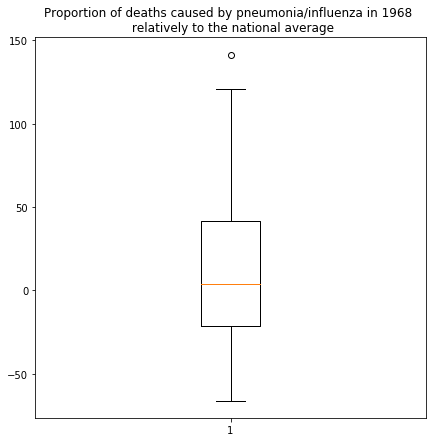

In [52]:
find_state_outliers(1968, boxplot=True)

In [53]:
for y in range(1962,2017):
    find_state_outliers(y)


High incidence outliers in 1962:
	Incidence in KS was 132.2% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1963:
	Incidence in KS was 109.8% above the national average.
	Incidence in NM was 109.5% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1964:
	Incidence in KS was 112.5% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1965:
	Incidence in KS was 127.6% above the national average.
	Incidence in NM was 98.7% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1966:
	Incidence in KS was 96.5% above the national average.
	Incidence in NM was 194.7% above the national average.

--------------------------------------------------------------------------


Rough summary

* 1960s: KS and NM bad
* 1970s: KS and NM, together with OK, VA and RI, bad
* 1980s: HI bad at the end of the decade, otherwise no outliers.
* 1990s: DE good
* 2000s: DC good, DE flips from good to bad, IA, CT, CA bad
* 2010s: HI bad

In [54]:
def find_city_outliers(year, whiskers=1.5, boxplot=False, verbose=False):
    
    df_year = df_PI_incidence_by_city.loc[year]
    q1_US, q3_US = df_year['US_rel_diff'].quantile(0.25), df_year['US_rel_diff'].quantile(0.75)
    
    pos_outliers_US = df_year.loc[df_year['US_rel_diff'] < q1_US - whiskers*(q3_US-q1_US)]
    neg_outliers_US = df_year.loc[df_year['US_rel_diff'] > q3_US + whiskers*(q3_US-q1_US)]
        
    if pos_outliers_US.empty:
        if verbose == True:
            print('Low incidence outliers in {}:'.format(year))
            print('\t' + 'No state was far below the national average.')
        else:
            pass
    else:
        print('Low incidence outliers in {}:'.format(year))
        for i in range(pos_outliers_US.shape[0]):
            print('\t' + 'Incidence in {0[0]} ({0[1]}) was {1:.1f}% below the national average.'.format(pos_outliers_US.index[i], -100*pos_outliers_US.iloc[i,-2]))
        
    if neg_outliers_US.empty:
        if verbose == True:
            print('\n'+'High incidence outliers in {}:'.format(year))
            print('\t' + 'No state was far above the national average.')
        else:
            pass
    else:
        print('\n'+'High incidence outliers in {}:'.format(year))
        for i in range(neg_outliers_US.shape[0]):
            print('\t' + 'Incidence in {0[0]} ({0[1]}) was {1:.1f}% above the national average.'.format(neg_outliers_US.index[i], 100*neg_outliers_US.iloc[i,-2]))
    
    if (not pos_outliers_US.empty or not neg_outliers_US.empty):
        print('\n--------------------------------------------------------------------------\n')
        
    if boxplot == True:
        fig, ax = plt.subplots()
        fig.set_size_inches(7, 7)
        ax.boxplot(df_year['US_rel_diff']*100, whis=whiskers)
        ax.set(title='Proportion of deaths caused by pneumonia/influenza in {0} \n relatively to the national average'.format(year))
        plt.show()


High incidence outliers in 1997:
	Incidence in Long Beach (CA) was 127.1% above the national average.

--------------------------------------------------------------------------



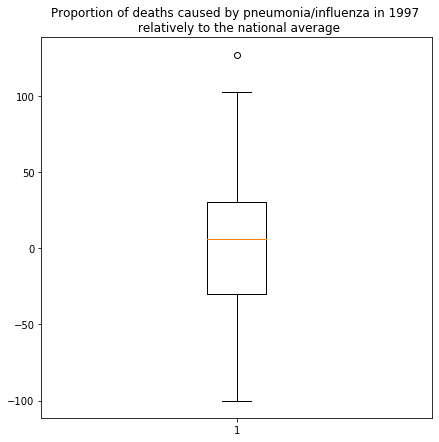

In [55]:
find_city_outliers(1997, boxplot=True)

In [56]:
for y in range(1962,2017):
    find_city_outliers(y)


High incidence outliers in 1962:
	Incidence in Austin (TX) was 220.6% above the national average.
	Incidence in Ogden (UT) was 216.2% above the national average.
	Incidence in San Jose (CA) was 209.5% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1963:
	Incidence in Austin (TX) was 234.8% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1965:
	Incidence in Utica (NY) was 316.1% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1966:
	Incidence in Utica (NY) was 263.1% above the national average.

--------------------------------------------------------------------------


High incidence outliers in 1969:
	Incidence in Cambridge (MA) was 415.2% above the national average.

----------------------------------------------------------------

Rough summary

* 1960s: Austin and Utica were bad for two-three years.
* 1970s: Cambridge was very bad for six years and Pueblo rather bad for two.
* 1980s: Cambridge occasionally bad
* 1990s: Reading and Long beach bad for a few years
* 2000s: Jersey City, Elizabeth, Wilimington, New Orleans, Baton Rouge particularly good; Glendale, Long Beach and others bad.
* 2010s: Somerville, Springfield and a few others particularly good; Glendale, Worcester bad.